# Training and Evaluation of different Machine Learning Algorithms

In [1]:
# load required packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

## Train and Test Data
We load the train and the test data which we splitted in _preprocessing.ipynb_.

In [2]:
# read train and test data

from datetime import datetime
import os

# train_data
train_data_files = sorted([f for f in os.listdir("data") if (f.endswith(".csv") and (f.startswith("train_data_")))], reverse=True)
latest_train_data = train_data_files[0]
train_data = pd.read_csv(f"data/{latest_train_data}")

# drop new generated index column
train_data.drop(train_data.columns[0], axis=1, inplace=True)
display(train_data.head())

# split train_data for models
y_train = train_data['Survived']
X_train = train_data.drop('Survived', axis=1)


# test_data
test_data_files = sorted([f for f in os.listdir("data") if (f.endswith(".csv") and (f.startswith("test_data_")))], reverse=True)
latest_test_data = test_data_files[0]
test_data = pd.read_csv(f"data/{latest_test_data}")

#drop new generated index column
test_data.drop(test_data.columns[0], axis=1, inplace=True)
display(test_data.head())

# split test_data for models
y_test = test_data['Survived']
X_test = test_data.drop('Survived', axis=1)

,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble,Survived
0,1,0,2,1,0,4,7,0,0,1,1,0,0,0,0,1
1,3,0,0,0,3,1,0,0,0,1,0,1,0,0,0,0
2,3,1,1,1,0,2,0,0,0,1,0,0,0,1,0,1
3,2,1,2,1,4,3,0,0,0,1,0,1,0,0,0,0
4,2,1,1,1,4,3,0,0,0,1,0,1,0,0,0,0


,Pclass,SibSp,Parch,Age_true,AgeGroup,FareGroup,CabinLvl,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Mr,Title_Mrs,Title_Ms,Title_Noble,Survived
0,3,1,1,0,0,2,0,1,0,0,1,0,0,0,0,1
1,2,0,0,1,3,1,0,0,0,1,0,1,0,0,0,0
2,3,0,0,1,2,1,0,0,0,1,0,1,0,0,0,0
3,2,0,1,1,0,3,0,0,0,1,0,0,0,1,0,1
4,3,1,0,1,1,2,0,1,0,0,0,0,0,1,0,1


## Model 1: Baseline Model

Option A: Our baseline model predicts "No Survival" (Class 0) for all passengers since 0 is the most common value of variable 'Survived' in the train data. This results in an accuracy of 58.58% and a f1 score of 0% on the test data.  
Option B: Our baseline model predicts "Survival" (Class 1) for first-class passengers and "No Survival" (Class 0) if a passenger has ticket class 2 or 3. We determined those values by taking the most common value of the variable 'Survived' for each 'Pclass' in the train data. This results in an accuracy of 69.40% and a f1 score of 56.38% on the test data.

In [3]:
# Option A - predict "No Survival" for all passengers
train_data.groupby('Survived').size()

baseline_pred_A = pd.Series(np.zeros(len(y_test)))

baseline_acc_A = accuracy_score(y_test, baseline_pred_A)
print("Accuracy =", baseline_acc_A) #0.585820895522388

baseline_f1_A = f1_score(y_test, baseline_pred_A)
print("F1 Score =", baseline_f1_A) #0.0

print("Classification Report:")
print(classification_report(y_test, baseline_pred_A))

print("Confusion Matrix:")
print(confusion_matrix(y_test, baseline_pred_A))

Accuracy = 0.585820895522388
F1 Score = 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       157
           1       0.00      0.00      0.00       111

    accuracy                           0.59       268
   macro avg       0.29      0.50      0.37       268
weighted avg       0.34      0.59      0.43       268

Confusion Matrix:
[[157   0]
 [111   0]]


C:\Users\kikip\anaconda3\envs\dm1_hws22\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kikip\anaconda3\envs\dm1_hws22\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kikip\anaconda3\envs\dm1_hws22\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
# Option B - predict "Survival" or "No Survival" based on 'Pclass'

# for each 'PClass' find number of passengers that survived and did not survive
print(train_data.groupby(['Pclass', 'Survived']).size())
# if 'Pclass'==1, we predict 'Survived'=1, else we predict 'Survived'=0

Pclass  Survived
1       0            56
        1            83
2       0            69
        1            63
3       0           267
        1            85
dtype: int64


In [5]:
# make prediction
X_test['baseline_pred_B'] = 0
X_test.loc[X_test['Pclass'] == 1, 'baseline_pred_B'] = 1
baseline_pred_B = X_test.baseline_pred_B
X_test.drop('baseline_pred_B', axis=1, inplace=True)

# print performance measures
baseline_acc_B = accuracy_score(y_test, baseline_pred_B)
print("Accuracy =", baseline_acc_B) #0.6940298507462687

baseline_f1_B = f1_score(y_test, baseline_pred_B)
print("F1 Score =", baseline_f1_B) #0.5638297872340425

print("Classification Report:")
print(classification_report(y_test, baseline_pred_B))

print("Confusion Matrix:")
print(confusion_matrix(y_test, baseline_pred_B))

Accuracy = 0.6940298507462687
F1 Score = 0.5638297872340425
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.85      0.76       157
           1       0.69      0.48      0.56       111

    accuracy                           0.69       268
   macro avg       0.69      0.66      0.66       268
weighted avg       0.69      0.69      0.68       268

Confusion Matrix:
[[133  24]
 [ 58  53]]


## Model 2: XGBoost
We train the _XGBClassifier_ from the _xgboost_-module. First, we train a simple model with the default parameters and then we perform grid search to determine the best hyper parameter combination for our data set.

https://www.datacamp.com/tutorial/xgboost-in-python  
https://thinkingneuron.com/how-to-create-a-classification-model-using-xgboost-in-python/  
https://towardsdatascience.com/a-guide-to-xgboost-hyperparameters-87980c7f44a9 (Hyperparameter Cheatsheet)  
https://towardsdatascience.com/beyond-grid-search-hypercharge-hyperparameter-tuning-for-xgboost-7c78f7a2929d (Step by Step Tuning)

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

### Simple XGB-Classifier with default parameters
As a baseline for the xgboost Classifier we train it with the default parameters which results in an accuracy of 79.10% and a f1 score of 73.08%.

In [7]:
# simple XGB-Classifier with default parameters

random.seed(10)

xgb_simple = XGBClassifier()
xgb_simple.fit(X_train, y_train)
xgb_simple_pred = xgb_simple.predict(X_test)

xgb_simple_acc = accuracy_score(y_test, xgb_simple_pred)
print("Accuracy =", xgb_simple_acc) #0.7910447761194029

xgb_simple_f1 = f1_score(y_test, xgb_simple_pred)
print("F1 Score =", xgb_simple_f1) #0.7307692307692308

print("Classification Report:")
print(classification_report(y_test, xgb_simple_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_simple_pred))

Accuracy = 0.8097014925373134
F1 Score = 0.7536231884057971
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       157
           1       0.81      0.70      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

Confusion Matrix:
[[139  18]
 [ 33  78]]


### Hyper parameter-Tuning for best hyper parameter setting

We perform grid search to find the best hyper parameter setting using the following hyper parameters:
- _max_depth_
- _subsample_
- _gamma_
- _colsample_bytree_
- _colsample_bylevel_
- _learning_rate_
- _n _estimators_

#### First Attempt
We start by tuning on a small grid, i.e., we only use two possible values for each hyper parameter. The best combination of hyper parameters for this grid search is: {'colsample_bylevel': 0.3, 'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}. Then, we train the XGBoost Classifier with this hyper parameter setting on the whole train data which results in an accuracy of 82.09% and a f1 score of 77.36%.

In [7]:
# First Attempt

random.seed(10)

# create an estimator
xgb = XGBClassifier()

# specify the parameter grid
xgb_parameters = {
    'max_depth': [3, 5]
    , 'subsample': [0.3, 0.8]
    , 'colsample_bytree': [0.3, 0.8]
    , 'colsample_bylevel': [0.3, 0.8]
    , 'learning_rate': [0.3, 0.7]
    , 'n_estimators': [50, 100]
    #, 'gamma': [0.5, 1, 3]
}

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create grid search instance
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

# run the grid search
xgb_grid_search.fit(X_train, y_train)

# print the results of all hyper parameter combinations
xgb_grid_search_results_round1 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_round1)

# print the best parameter setting
print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8409114183307732 with params
#{'colsample_bylevel': 0.3, 'colsample_bytree': 0.3, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round1.to_csv(f"results/xgb_results_round1_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038495,0.003062,0.006681,0.000456,0.3,0.3,0.3,3,50,0.3,...,0.854839,0.790323,0.806452,0.790323,0.822581,0.693548,0.854839,0.818433,0.049987,41
1,0.036502,0.000662,0.006683,0.000457,0.3,0.3,0.3,3,50,0.8,...,0.854839,0.806452,0.870968,0.790323,0.822581,0.677419,0.854839,0.824885,0.055524,23
2,0.068317,0.003433,0.006682,0.000639,0.3,0.3,0.3,3,100,0.3,...,0.854839,0.822581,0.854839,0.790323,0.822581,0.741935,0.838710,0.834485,0.040747,3
3,0.069015,0.006352,0.007181,0.000399,0.3,0.3,0.3,3,100,0.8,...,0.838710,0.806452,0.887097,0.806452,0.822581,0.709677,0.854839,0.836073,0.052347,2
4,0.046675,0.004501,0.007482,0.000807,0.3,0.3,0.3,5,50,0.3,...,0.854839,0.774194,0.806452,0.806452,0.806452,0.693548,0.870968,0.818433,0.052027,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.092054,0.012248,0.007182,0.001244,0.8,0.8,0.7,3,100,0.8,...,0.854839,0.790323,0.806452,0.822581,0.758065,0.693548,0.806452,0.823067,0.065056,33
60,0.049867,0.003569,0.006881,0.000699,0.8,0.8,0.7,5,50,0.3,...,0.838710,0.741935,0.741935,0.790323,0.838710,0.709677,0.854839,0.794470,0.050498,63
61,0.058244,0.007180,0.006883,0.001218,0.8,0.8,0.7,5,50,0.8,...,0.854839,0.790323,0.774194,0.822581,0.822581,0.709677,0.838710,0.816846,0.053297,50
62,0.091609,0.011597,0.007080,0.000829,0.8,0.8,0.7,5,100,0.3,...,0.806452,0.741935,0.741935,0.838710,0.774194,0.725806,0.838710,0.803917,0.053965,59


best score is 0.8360983102918587 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.3, 'learning_rate': 0.7, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [9]:
# store relevant columns and sort by rank_test_score
cols_round1 = ['param_max_depth', 'param_subsample', 'param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'mean_test_score', 'rank_test_score']
xgb_results_round1_sorted = xgb_grid_search_results_round1[cols_round1]
xgb_results_round1_sorted = xgb_results_round1_sorted.sort_values(by='rank_test_score')
display(xgb_results_round1_sorted)

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_results_round1_sorted.to_csv(f"results/xgb_results_round1_sorted_{date}.csv")

,param_max_depth,param_subsample,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_n_estimators,mean_test_score,rank_test_score
1,3,0.8,0.3,0.3,0.3,50,0.840911,1
3,3,0.8,0.3,0.3,0.3,100,0.840911,1
11,3,0.8,0.3,0.3,0.7,100,0.839247,3
21,5,0.8,0.3,0.8,0.3,50,0.836175,4
17,3,0.8,0.3,0.8,0.3,50,0.836098,5
...,...,...,...,...,...,...,...,...
28,5,0.3,0.3,0.8,0.7,50,0.797491,60
46,5,0.3,0.8,0.3,0.7,100,0.797491,61
30,5,0.3,0.3,0.8,0.7,100,0.795955,62
44,5,0.3,0.8,0.3,0.7,50,0.792857,63


In [10]:
# Fit and evaluate best model

xgb_best = XGBClassifier(max_depth = 3, subsample = 0.8, colsample_bylevel = 0.3, colsample_bytree = 0.3, learning_rate = 0.3, n_estimators = 50)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8208955223880597

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.7735849056603774

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8208955223880597
F1 Score = 0.7735849056603774
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       157
           1       0.81      0.74      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Confusion Matrix:
[[138  19]
 [ 29  82]]


#### Second Attempt
We perform a hyper parameter tuning using the following parameters and values:  

{'max_depth': [2,3,4,5]  
, 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]  
, 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9]  
, 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4, 0.6, 0.7]  
, 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]  
, 'n_estimators': [100, 150, 200, 250, 300]}  

The best hyper parameter setting results to be {'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7} which leads to an accuracy of 82.84% and a f1 score of 77.88% on the test data (after training the classifier on the whole train data).

In [11]:
# read single parts of round 2, concatenate and update index and rank_test_score

df1 = pd.read_csv("data\\xgb_results_full_1_bylevel=0.1_20221123.csv")
df1.drop(df1.columns[0], axis=1, inplace=True)

df2 = pd.read_csv("data\\xgb_results_full_2_bylevel=0.2_20221123.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)

df3 = pd.read_csv("data\\xgb_results_full_3_bylevel=0.3_20221123.csv")
df3.drop(df3.columns[0], axis=1, inplace=True)

df4 = pd.read_csv("data\\xgb_results_full_4_bylevel=0.4_20221123.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)

df5 = pd.read_csv("data\\xgb_results_full_5_bylevel=0.6_20221123.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)

df6 = pd.read_csv("data\\xgb_results_full_6_bylevel=0.7_20221123.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)

df_full = pd.concat([df1,df2,df3,df4,df5,df6])

#assign correct rank
df_full = df_full.sort_values(by='mean_test_score', ascending=False)
df_full['rank_test_score'] = range(1, len(df_full)+1)

#get correct order and set new index
df_full = df_full.sort_values(by=['param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_subsample'])
xgb_grid_search_results_round2 = df_full.set_index(np.array(range(len(df_full))))
display(xgb_grid_search_results_round2)

print("best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}")

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round2.to_csv(f"results/xgb_results_round2_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064527,0.004136,0.005885,0.000538,0.1,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,15186
1,0.064327,0.002493,0.005885,0.000537,0.1,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,12810
2,0.063231,0.001954,0.005785,0.000399,0.1,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,12084
3,0.062235,0.001017,0.006082,0.000300,0.1,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,11402
4,0.062333,0.002285,0.005784,0.000399,0.1,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,8256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.228489,0.002462,0.007480,0.000499,0.7,0.9,0.4,5,300,0.5,...,0.822581,0.774194,0.806452,0.822581,0.774194,0.709677,0.774194,0.802355,0.049888,17998
17996,0.228688,0.002142,0.007281,0.000457,0.7,0.9,0.4,5,300,0.6,...,0.822581,0.774194,0.790323,0.822581,0.790323,0.693548,0.790323,0.800768,0.052893,17999
17997,0.228987,0.001197,0.007580,0.000488,0.7,0.9,0.4,5,300,0.7,...,0.870968,0.774194,0.774194,0.790323,0.790323,0.709677,0.790323,0.810317,0.057193,17871
17998,0.228788,0.001620,0.007181,0.000399,0.7,0.9,0.4,5,300,0.8,...,0.822581,0.790323,0.774194,0.822581,0.790323,0.709677,0.806452,0.816692,0.055624,17108


best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}


In [11]:
# Second Attempt

random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                , 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                , 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9]
                , 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4, 0.6, 0.7]
                , 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
                , 'n_estimators': [100, 150, 200, 250, 300]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_round2 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_round2)

# print the best parameter setting
print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.850563 with params
#{'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round2.to_csv(f"results/xgb_results_round2_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064527,0.004136,0.005885,0.000538,0.1,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2840
1,0.064327,0.002493,0.005885,0.000537,0.1,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,5179
2,0.063231,0.001954,0.005785,0.000399,0.1,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,5860
3,0.062235,0.001017,0.006082,0.000300,0.1,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,6715
4,0.062333,0.002285,0.005784,0.000399,0.1,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,9897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.228489,0.002462,0.007480,0.000499,0.7,0.9,0.4,5,300,0.5,...,0.822581,0.774194,0.806452,0.822581,0.774194,0.709677,0.774194,0.802355,0.049888,3
17996,0.228688,0.002142,0.007281,0.000457,0.7,0.9,0.4,5,300,0.6,...,0.822581,0.774194,0.790323,0.822581,0.790323,0.693548,0.790323,0.800768,0.052893,2
17997,0.228987,0.001197,0.007580,0.000488,0.7,0.9,0.4,5,300,0.7,...,0.870968,0.774194,0.774194,0.790323,0.790323,0.709677,0.790323,0.810317,0.057193,139
17998,0.228788,0.001620,0.007181,0.000399,0.7,0.9,0.4,5,300,0.8,...,0.822581,0.790323,0.774194,0.822581,0.790323,0.709677,0.806452,0.816692,0.055624,893


In [12]:
# store relevant columns and sort by rank_test_score
cols_round2 = ['param_max_depth', 'param_subsample', 'param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'mean_test_score', 'rank_test_score']
xgb_results_round2_sorted = xgb_grid_search_results_round2[cols_round2]
xgb_results_round2_sorted = xgb_results_round2_sorted.sort_values(by='rank_test_score')
display(xgb_results_round2_sorted)

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_results_round2_sorted.to_csv(f"results/xgb_results_round2_sorted_{date}.csv")

,param_max_depth,param_subsample,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_n_estimators,mean_test_score,rank_test_score
10302,2,0.7,0.4,0.5,0.15,100,0.850563,1
7302,2,0.7,0.3,0.5,0.15,100,0.850563,2
4976,5,0.6,0.2,0.6,0.15,100,0.850538,3
1976,5,0.6,0.1,0.6,0.15,100,0.850538,4
5419,2,0.9,0.2,0.9,0.10,250,0.849002,5
...,...,...,...,...,...,...,...,...
7745,3,0.5,0.3,0.5,0.40,300,0.803943,17996
13171,4,0.6,0.6,0.4,0.40,300,0.803917,17997
17995,5,0.5,0.7,0.9,0.40,300,0.802355,17998
17996,5,0.6,0.7,0.9,0.40,300,0.800768,17999


In [13]:
# Fit and evaluate best model

xgb_best = XGBClassifier(max_depth = 2, subsample = 0.7, colsample_bylevel = 0.4, colsample_bytree = 0.5, learning_rate = 0.15, n_estimators = 100)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8283582089552238

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.7788461538461539

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8283582089552238
F1 Score = 0.7788461538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

Confusion Matrix:
[[141  16]
 [ 30  81]]


#### ausführlich

In [21]:
df1 = pd.read_csv("data\\xgb_results_full_1_bylevel=0.1_20221123.csv")
df1.drop(df1.columns[0], axis=1, inplace=True)
display(df1)
print("best score is 0.8505376344086022 with params {'colsample_bylevel': 0.1, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064527,0.004136,0.005885,5.376236e-04,0.1,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2651
1,0.064327,0.002493,0.005885,5.374151e-04,0.1,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,2358
2,0.063231,0.001954,0.005785,3.990535e-04,0.1,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,2252
3,0.062235,0.001017,0.006082,3.001655e-04,0.1,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,2175
4,0.062333,0.002285,0.005784,3.991850e-04,0.1,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,1747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.180018,0.001496,0.007081,2.993507e-04,0.1,0.9,0.4,5,300,0.5,...,0.887097,0.806452,0.774194,0.822581,0.822581,0.725806,0.854839,0.828085,0.048801,1701
2996,0.182212,0.003339,0.006982,4.460618e-04,0.1,0.9,0.4,5,300,0.6,...,0.870968,0.774194,0.758065,0.806452,0.838710,0.741935,0.854839,0.826421,0.052840,1992
2997,0.181813,0.001548,0.007082,2.990570e-04,0.1,0.9,0.4,5,300,0.7,...,0.870968,0.790323,0.790323,0.790323,0.854839,0.709677,0.822581,0.824808,0.053239,2204
2998,0.181666,0.001723,0.006982,4.529953e-07,0.1,0.9,0.4,5,300,0.8,...,0.870968,0.790323,0.774194,0.806452,0.854839,0.741935,0.822581,0.823272,0.043729,2305


best score is 0.8505376344086022 with params {'colsample_bylevel': 0.1, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}


In [8]:
# Full Tuning - Part 1
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                   , 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.1]
                   , 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
                   , 'n_estimators': [100, 150, 200, 250, 300]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_1 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_1)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))

# best values for

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_1.to_csv(f"results/xgb_results_full_round2_1_bylevel=0.1_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064527,0.004136,0.005885,5.376236e-04,0.1,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2651
1,0.064327,0.002493,0.005885,5.374151e-04,0.1,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,2358
2,0.063231,0.001954,0.005785,3.990535e-04,0.1,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,2252
3,0.062235,0.001017,0.006082,3.001655e-04,0.1,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,2175
4,0.062333,0.002285,0.005784,3.991850e-04,0.1,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,1747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.180018,0.001496,0.007081,2.993507e-04,0.1,0.9,0.4,5,300,0.5,...,0.887097,0.806452,0.774194,0.822581,0.822581,0.725806,0.854839,0.828085,0.048801,1701
2996,0.182212,0.003339,0.006982,4.460618e-04,0.1,0.9,0.4,5,300,0.6,...,0.870968,0.774194,0.758065,0.806452,0.838710,0.741935,0.854839,0.826421,0.052840,1992
2997,0.181813,0.001548,0.007082,2.990570e-04,0.1,0.9,0.4,5,300,0.7,...,0.870968,0.790323,0.790323,0.790323,0.854839,0.709677,0.822581,0.824808,0.053239,2204
2998,0.181666,0.001723,0.006982,4.529953e-07,0.1,0.9,0.4,5,300,0.8,...,0.870968,0.790323,0.774194,0.806452,0.854839,0.741935,0.822581,0.823272,0.043729,2305


best score is 0.8505376344086022 with params {'colsample_bylevel': 0.1, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}


In [22]:
df2 = pd.read_csv("data\\xgb_results_full_2_bylevel=0.2_20221123.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)
display(df2)
print("best score is 0.8505376344086022 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062133,0.002485,0.006284,0.000639,0.2,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2663
1,0.063131,0.003027,0.006683,0.000457,0.2,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,2338
2,0.060438,0.000798,0.006782,0.000398,0.2,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,2222
3,0.059541,0.000779,0.006682,0.000457,0.2,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,2132
4,0.059840,0.001092,0.006782,0.000399,0.2,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,1661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.195577,0.001636,0.017653,0.031683,0.2,0.9,0.4,5,300,0.5,...,0.822581,0.806452,0.774194,0.790323,0.790323,0.741935,0.822581,0.819918,0.052433,2744
2996,0.221308,0.011234,0.006782,0.000399,0.2,0.9,0.4,5,300,0.6,...,0.838710,0.806452,0.774194,0.822581,0.838710,0.693548,0.822581,0.819995,0.058351,2693
2997,0.226194,0.002309,0.007082,0.000299,0.2,0.9,0.4,5,300,0.7,...,0.838710,0.790323,0.758065,0.806452,0.854839,0.725806,0.822581,0.821582,0.054587,2581
2998,0.199167,0.006213,0.007381,0.000489,0.2,0.9,0.4,5,300,0.8,...,0.838710,0.822581,0.774194,0.838710,0.822581,0.725806,0.790323,0.823195,0.052389,2389


best score is 0.8505376344086022 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}


In [9]:
# Full Tuning - Part 2
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                   , 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.2]
                   , 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
                   , 'n_estimators': [100, 150, 200, 250, 300]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_2 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_2)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8505376344086022 with params
#{'colsample_bylevel': 0.2, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_2.to_csv(f"results/xgb_results_full_round2_2_bylevel=0.2_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062133,0.002485,0.006284,0.000639,0.2,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2663
1,0.063131,0.003027,0.006683,0.000457,0.2,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,2338
2,0.060438,0.000798,0.006782,0.000398,0.2,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,2222
3,0.059541,0.000779,0.006682,0.000457,0.2,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,2132
4,0.059840,0.001092,0.006782,0.000399,0.2,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,1661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.195577,0.001636,0.017653,0.031683,0.2,0.9,0.4,5,300,0.5,...,0.822581,0.806452,0.774194,0.790323,0.790323,0.741935,0.822581,0.819918,0.052433,2744
2996,0.221308,0.011234,0.006782,0.000399,0.2,0.9,0.4,5,300,0.6,...,0.838710,0.806452,0.774194,0.822581,0.838710,0.693548,0.822581,0.819995,0.058351,2693
2997,0.226194,0.002309,0.007082,0.000299,0.2,0.9,0.4,5,300,0.7,...,0.838710,0.790323,0.758065,0.806452,0.854839,0.725806,0.822581,0.821582,0.054587,2581
2998,0.199167,0.006213,0.007381,0.000489,0.2,0.9,0.4,5,300,0.8,...,0.838710,0.822581,0.774194,0.838710,0.822581,0.725806,0.790323,0.823195,0.052389,2389


best score is 0.8505376344086022 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}


In [23]:
df3 = pd.read_csv("data\\xgb_results_full_3_bylevel=0.3_20221123.csv")
df3.drop(df3.columns[0], axis=1, inplace=True)
display(df3)
print("best score is 0.850563236047107 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062034,0.001596,0.006882,0.000537,0.3,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2509
1,0.068327,0.005910,0.006573,0.000502,0.3,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,2140
2,0.065225,0.003191,0.006683,0.000457,0.3,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,2021
3,0.063630,0.001596,0.006483,0.000499,0.3,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,1898
4,0.061435,0.001493,0.006483,0.000498,0.3,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,1394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.206226,0.002782,0.007182,0.000598,0.3,0.9,0.4,5,300,0.5,...,0.838710,0.790323,0.774194,0.838710,0.822581,0.709677,0.822581,0.813646,0.044452,2900
2996,0.207998,0.002457,0.007280,0.000457,0.3,0.9,0.4,5,300,0.6,...,0.854839,0.774194,0.790323,0.854839,0.806452,0.693548,0.854839,0.818459,0.053856,2648
2997,0.207744,0.000898,0.007480,0.000499,0.3,0.9,0.4,5,300,0.7,...,0.854839,0.790323,0.758065,0.822581,0.806452,0.709677,0.822581,0.813594,0.056215,2908
2998,0.208343,0.001863,0.007280,0.000457,0.3,0.9,0.4,5,300,0.8,...,0.854839,0.790323,0.790323,0.822581,0.806452,0.693548,0.822581,0.815207,0.053961,2850


best score is 0.850563236047107 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}


In [10]:
# Full Tuning - Part 3
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                   , 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.3]
                   , 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
                   , 'n_estimators': [100, 150, 200, 250, 300]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_3 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_3)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.850563236047107 with params
#{'colsample_bylevel': 0.3, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_3.to_csv(f"results/xgb_results_full_round2_3_bylevel=0.3_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062034,0.001596,0.006882,0.000537,0.3,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2509
1,0.068327,0.005910,0.006573,0.000502,0.3,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,2140
2,0.065225,0.003191,0.006683,0.000457,0.3,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,2021
3,0.063630,0.001596,0.006483,0.000499,0.3,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,1898
4,0.061435,0.001493,0.006483,0.000498,0.3,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,1394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.206226,0.002782,0.007182,0.000598,0.3,0.9,0.4,5,300,0.5,...,0.838710,0.790323,0.774194,0.838710,0.822581,0.709677,0.822581,0.813646,0.044452,2900
2996,0.207998,0.002457,0.007280,0.000457,0.3,0.9,0.4,5,300,0.6,...,0.854839,0.774194,0.790323,0.854839,0.806452,0.693548,0.854839,0.818459,0.053856,2648
2997,0.207744,0.000898,0.007480,0.000499,0.3,0.9,0.4,5,300,0.7,...,0.854839,0.790323,0.758065,0.822581,0.806452,0.709677,0.822581,0.813594,0.056215,2908
2998,0.208343,0.001863,0.007280,0.000457,0.3,0.9,0.4,5,300,0.8,...,0.854839,0.790323,0.790323,0.822581,0.806452,0.693548,0.822581,0.815207,0.053961,2850


best score is 0.850563236047107 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}


In [24]:
df4 = pd.read_csv("data\\xgb_results_full_4_bylevel=0.4_20221123.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)
display(df4)
print("best score is 0.850563236047107 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061735,0.001296,0.006482,0.000669,0.4,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2502
1,0.063031,0.002778,0.006483,0.000669,0.4,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,2077
2,0.060638,0.000746,0.006782,0.000399,0.4,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,1941
3,0.060339,0.000919,0.006483,0.000499,0.4,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,1818
4,0.059840,0.001180,0.006682,0.000457,0.4,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,1289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.218216,0.004179,0.007181,0.000399,0.4,0.9,0.4,5,300,0.5,...,0.838710,0.758065,0.790323,0.806452,0.790323,0.741935,0.822581,0.808807,0.046180,2975
2996,0.221009,0.003402,0.007480,0.000499,0.4,0.9,0.4,5,300,0.6,...,0.838710,0.790323,0.806452,0.838710,0.774194,0.725806,0.790323,0.812007,0.049754,2922
2997,0.221308,0.004515,0.007380,0.000489,0.4,0.9,0.4,5,300,0.7,...,0.838710,0.790323,0.790323,0.790323,0.822581,0.725806,0.822581,0.816795,0.050406,2770
2998,0.219213,0.003908,0.007194,0.000425,0.4,0.9,0.4,5,300,0.8,...,0.838710,0.790323,0.806452,0.838710,0.790323,0.725806,0.806452,0.816820,0.047212,2763


best score is 0.850563236047107 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}


In [11]:
# Full Tuning - Part 4
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                   , 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.4]
                   , 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
                   , 'n_estimators': [100, 150, 200, 250, 300]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_4 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_4)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.850563236047107 with params
#{'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_4.to_csv(f"results/xgb_results_full_round2_4_bylevel=0.4_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061735,0.001296,0.006482,0.000669,0.4,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2502
1,0.063031,0.002778,0.006483,0.000669,0.4,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,2077
2,0.060638,0.000746,0.006782,0.000399,0.4,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,1941
3,0.060339,0.000919,0.006483,0.000499,0.4,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,1818
4,0.059840,0.001180,0.006682,0.000457,0.4,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,1289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.218216,0.004179,0.007181,0.000399,0.4,0.9,0.4,5,300,0.5,...,0.838710,0.758065,0.790323,0.806452,0.790323,0.741935,0.822581,0.808807,0.046180,2975
2996,0.221009,0.003402,0.007480,0.000499,0.4,0.9,0.4,5,300,0.6,...,0.838710,0.790323,0.806452,0.838710,0.774194,0.725806,0.790323,0.812007,0.049754,2922
2997,0.221308,0.004515,0.007380,0.000489,0.4,0.9,0.4,5,300,0.7,...,0.838710,0.790323,0.790323,0.790323,0.822581,0.725806,0.822581,0.816795,0.050406,2770
2998,0.219213,0.003908,0.007194,0.000425,0.4,0.9,0.4,5,300,0.8,...,0.838710,0.790323,0.806452,0.838710,0.790323,0.725806,0.806452,0.816820,0.047212,2763


best score is 0.850563236047107 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}


In [25]:
df5 = pd.read_csv("data\\xgb_results_full_5_bylevel=0.6_20221123.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)
display(df5)
print("best score is 0.8458269329237071 with params {'colsample_bylevel': 0.6, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063530,0.002446,0.006383,0.000662,0.6,0.3,0.1,2,100,0.5,...,0.870968,0.822581,0.838710,0.854839,0.822581,0.709677,0.838710,0.834537,0.044892,215
1,0.065725,0.003351,0.006882,0.000299,0.6,0.3,0.1,2,100,0.6,...,0.854839,0.822581,0.854839,0.854839,0.822581,0.693548,0.854839,0.832949,0.048291,320
2,0.062236,0.001196,0.006780,0.000398,0.6,0.3,0.1,2,100,0.7,...,0.887097,0.838710,0.854839,0.854839,0.838710,0.709677,0.854839,0.842601,0.046342,17
3,0.061335,0.001798,0.006583,0.000489,0.6,0.3,0.1,2,100,0.8,...,0.870968,0.822581,0.870968,0.838710,0.822581,0.693548,0.854839,0.834562,0.050284,208
4,0.060937,0.000698,0.006483,0.000669,0.6,0.3,0.1,2,100,0.9,...,0.870968,0.822581,0.887097,0.822581,0.806452,0.677419,0.854839,0.832924,0.057218,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.219613,0.001532,0.007380,0.000488,0.6,0.9,0.4,5,300,0.5,...,0.806452,0.741935,0.774194,0.806452,0.790323,0.741935,0.806452,0.805504,0.051226,2997
2996,0.222105,0.001787,0.006882,0.000698,0.6,0.9,0.4,5,300,0.6,...,0.854839,0.790323,0.758065,0.822581,0.741935,0.725806,0.806452,0.810317,0.059764,2968
2997,0.221906,0.002534,0.007281,0.000457,0.6,0.9,0.4,5,300,0.7,...,0.838710,0.774194,0.790323,0.822581,0.774194,0.725806,0.822581,0.818331,0.051641,2706
2998,0.224599,0.011023,0.007380,0.000489,0.6,0.9,0.4,5,300,0.8,...,0.838710,0.790323,0.758065,0.822581,0.806452,0.709677,0.806452,0.816718,0.054669,2825


best score is 0.8458269329237071 with params {'colsample_bylevel': 0.6, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}


In [12]:
# Full Tuning - Part 5
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                   , 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.6]
                   , 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
                   , 'n_estimators': [100, 150, 200, 250, 300]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_5 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_5)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8458269329237071 with params
#{'colsample_bylevel': 0.6, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_5.to_csv(f"results/xgb_results_full_round2_5_bylevel=0.6_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063530,0.002446,0.006383,0.000662,0.6,0.3,0.1,2,100,0.5,...,0.870968,0.822581,0.838710,0.854839,0.822581,0.709677,0.838710,0.834537,0.044892,215
1,0.065725,0.003351,0.006882,0.000299,0.6,0.3,0.1,2,100,0.6,...,0.854839,0.822581,0.854839,0.854839,0.822581,0.693548,0.854839,0.832949,0.048291,320
2,0.062236,0.001196,0.006780,0.000398,0.6,0.3,0.1,2,100,0.7,...,0.887097,0.838710,0.854839,0.854839,0.838710,0.709677,0.854839,0.842601,0.046342,17
3,0.061335,0.001798,0.006583,0.000489,0.6,0.3,0.1,2,100,0.8,...,0.870968,0.822581,0.870968,0.838710,0.822581,0.693548,0.854839,0.834562,0.050284,208
4,0.060937,0.000698,0.006483,0.000669,0.6,0.3,0.1,2,100,0.9,...,0.870968,0.822581,0.887097,0.822581,0.806452,0.677419,0.854839,0.832924,0.057218,327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.219613,0.001532,0.007380,0.000488,0.6,0.9,0.4,5,300,0.5,...,0.806452,0.741935,0.774194,0.806452,0.790323,0.741935,0.806452,0.805504,0.051226,2997
2996,0.222105,0.001787,0.006882,0.000698,0.6,0.9,0.4,5,300,0.6,...,0.854839,0.790323,0.758065,0.822581,0.741935,0.725806,0.806452,0.810317,0.059764,2968
2997,0.221906,0.002534,0.007281,0.000457,0.6,0.9,0.4,5,300,0.7,...,0.838710,0.774194,0.790323,0.822581,0.774194,0.725806,0.822581,0.818331,0.051641,2706
2998,0.224599,0.011023,0.007380,0.000489,0.6,0.9,0.4,5,300,0.8,...,0.838710,0.790323,0.758065,0.822581,0.806452,0.709677,0.806452,0.816718,0.054669,2825


best score is 0.8458269329237071 with params {'colsample_bylevel': 0.6, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.8}


In [26]:
df6 = pd.read_csv("data\\xgb_results_full_6_bylevel=0.7_20221123.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)
display(df6)
print("best score is 0.8490015360983103 with params {'colsample_bylevel': 0.7, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.9}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063128,0.002527,0.006483,0.000669,0.7,0.3,0.1,2,100,0.5,...,0.870968,0.822581,0.838710,0.854839,0.822581,0.709677,0.838710,0.834537,0.044892,218
1,0.065325,0.003097,0.006882,0.000537,0.7,0.3,0.1,2,100,0.6,...,0.854839,0.822581,0.854839,0.854839,0.822581,0.693548,0.854839,0.832949,0.048291,327
2,0.061886,0.000566,0.006583,0.000489,0.7,0.3,0.1,2,100,0.7,...,0.887097,0.838710,0.854839,0.854839,0.838710,0.709677,0.854839,0.842601,0.046342,16
3,0.061137,0.000638,0.006882,0.000299,0.7,0.3,0.1,2,100,0.8,...,0.870968,0.822581,0.870968,0.838710,0.822581,0.693548,0.854839,0.834562,0.050284,210
4,0.060537,0.000638,0.006682,0.000457,0.7,0.3,0.1,2,100,0.9,...,0.870968,0.822581,0.887097,0.822581,0.806452,0.677419,0.854839,0.832924,0.057218,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.228489,0.002462,0.007480,0.000499,0.7,0.9,0.4,5,300,0.5,...,0.822581,0.774194,0.806452,0.822581,0.774194,0.709677,0.774194,0.802355,0.049888,2998
2996,0.228688,0.002142,0.007281,0.000457,0.7,0.9,0.4,5,300,0.6,...,0.822581,0.774194,0.790323,0.822581,0.790323,0.693548,0.790323,0.800768,0.052893,2999
2997,0.228987,0.001197,0.007580,0.000488,0.7,0.9,0.4,5,300,0.7,...,0.870968,0.774194,0.774194,0.790323,0.790323,0.709677,0.790323,0.810317,0.057193,2964
2998,0.228788,0.001620,0.007181,0.000399,0.7,0.9,0.4,5,300,0.8,...,0.822581,0.790323,0.774194,0.822581,0.790323,0.709677,0.806452,0.816692,0.055624,2812


best score is 0.8490015360983103 with params {'colsample_bylevel': 0.7, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.9}


In [13]:
# Full Tuning - Part 6
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]
                   , 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.7]
                   , 'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.4]
                   , 'n_estimators': [100, 150, 200, 250, 300]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_6 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_6)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8490015360983103 with params
#{'colsample_bylevel': 0.7, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.9}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_6.to_csv(f"results/xgb_results_full_round2_6_bylevel=0.7_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.063128,0.002527,0.006483,0.000669,0.7,0.3,0.1,2,100,0.5,...,0.870968,0.822581,0.838710,0.854839,0.822581,0.709677,0.838710,0.834537,0.044892,218
1,0.065325,0.003097,0.006882,0.000537,0.7,0.3,0.1,2,100,0.6,...,0.854839,0.822581,0.854839,0.854839,0.822581,0.693548,0.854839,0.832949,0.048291,327
2,0.061886,0.000566,0.006583,0.000489,0.7,0.3,0.1,2,100,0.7,...,0.887097,0.838710,0.854839,0.854839,0.838710,0.709677,0.854839,0.842601,0.046342,16
3,0.061137,0.000638,0.006882,0.000299,0.7,0.3,0.1,2,100,0.8,...,0.870968,0.822581,0.870968,0.838710,0.822581,0.693548,0.854839,0.834562,0.050284,210
4,0.060537,0.000638,0.006682,0.000457,0.7,0.3,0.1,2,100,0.9,...,0.870968,0.822581,0.887097,0.822581,0.806452,0.677419,0.854839,0.832924,0.057218,333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.228489,0.002462,0.007480,0.000499,0.7,0.9,0.4,5,300,0.5,...,0.822581,0.774194,0.806452,0.822581,0.774194,0.709677,0.774194,0.802355,0.049888,2998
2996,0.228688,0.002142,0.007281,0.000457,0.7,0.9,0.4,5,300,0.6,...,0.822581,0.774194,0.790323,0.822581,0.790323,0.693548,0.790323,0.800768,0.052893,2999
2997,0.228987,0.001197,0.007580,0.000488,0.7,0.9,0.4,5,300,0.7,...,0.870968,0.774194,0.774194,0.790323,0.790323,0.709677,0.790323,0.810317,0.057193,2964
2998,0.228788,0.001620,0.007181,0.000399,0.7,0.9,0.4,5,300,0.8,...,0.822581,0.790323,0.774194,0.822581,0.790323,0.709677,0.806452,0.816692,0.055624,2812


best score is 0.8490015360983103 with params {'colsample_bylevel': 0.7, 'colsample_bytree': 0.4, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.9}


Combine single hyper parameter tuning to find best values for hyper parameters

In [27]:
# read single parts of round 2, concatenate and update index and rank_test_score

df1 = pd.read_csv("data\\xgb_results_full_1_bylevel=0.1_20221123.csv")
df1.drop(df1.columns[0], axis=1, inplace=True)

df2 = pd.read_csv("data\\xgb_results_full_2_bylevel=0.2_20221123.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)

df3 = pd.read_csv("data\\xgb_results_full_3_bylevel=0.3_20221123.csv")
df3.drop(df3.columns[0], axis=1, inplace=True)

df4 = pd.read_csv("data\\xgb_results_full_4_bylevel=0.4_20221123.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)

df5 = pd.read_csv("data\\xgb_results_full_5_bylevel=0.6_20221123.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)

df6 = pd.read_csv("data\\xgb_results_full_6_bylevel=0.7_20221123.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)

df_full = pd.concat([df1,df2,df3,df4,df5,df6])

#assign correct rank
df_full = df_full.sort_values(by='mean_test_score', ascending=False)
df_full['rank_test_score'] = range(1, len(df_full)+1)

#get correct order and set new index
df_full = df_full.sort_values(by=['param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_subsample'])
xgb_grid_search_results_round2 = df_full.set_index(np.array(range(len(df_full))))
display(xgb_grid_search_results_round2)

print("best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}")

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round2.to_csv(f"results/xgb_results_round2_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064527,0.004136,0.005885,0.000538,0.1,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,15186
1,0.064327,0.002493,0.005885,0.000537,0.1,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,12810
2,0.063231,0.001954,0.005785,0.000399,0.1,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,12084
3,0.062235,0.001017,0.006082,0.000300,0.1,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,11402
4,0.062333,0.002285,0.005784,0.000399,0.1,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,8256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.228489,0.002462,0.007480,0.000499,0.7,0.9,0.4,5,300,0.5,...,0.822581,0.774194,0.806452,0.822581,0.774194,0.709677,0.774194,0.802355,0.049888,17998
17996,0.228688,0.002142,0.007281,0.000457,0.7,0.9,0.4,5,300,0.6,...,0.822581,0.774194,0.790323,0.822581,0.790323,0.693548,0.790323,0.800768,0.052893,17999
17997,0.228987,0.001197,0.007580,0.000488,0.7,0.9,0.4,5,300,0.7,...,0.870968,0.774194,0.774194,0.790323,0.790323,0.709677,0.790323,0.810317,0.057193,17871
17998,0.228788,0.001620,0.007181,0.000399,0.7,0.9,0.4,5,300,0.8,...,0.822581,0.790323,0.774194,0.822581,0.790323,0.709677,0.806452,0.816692,0.055624,17108


best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.7}


In [28]:
# store relevant columns and sort by rank_test_score
cols_full = ['param_max_depth', 'param_subsample', 'param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'mean_test_score', 'rank_test_score']
xgb_results_round2_sorted = xgb_grid_search_results_round2[cols_full]
xgb_results_round2_sorted = xgb_results_round2_sorted.sort_values(by='rank_test_score')
display(xgb_results_round2_sorted)

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_results_round2_sorted.to_csv(f"results/xgb_results_round2_sorted_{date}.csv")

,param_max_depth,param_subsample,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_n_estimators,mean_test_score,rank_test_score
10302,2,0.7,0.4,0.5,0.15,100,0.850563,1
7302,2,0.7,0.3,0.5,0.15,100,0.850563,2
4976,5,0.6,0.2,0.6,0.15,100,0.850538,3
1976,5,0.6,0.1,0.6,0.15,100,0.850538,4
5419,2,0.9,0.2,0.9,0.10,250,0.849002,5
...,...,...,...,...,...,...,...,...
7745,3,0.5,0.3,0.5,0.40,300,0.803943,17996
13171,4,0.6,0.6,0.4,0.40,300,0.803917,17997
17995,5,0.5,0.7,0.9,0.40,300,0.802355,17998
17996,5,0.6,0.7,0.9,0.40,300,0.800768,17999


In [29]:
# Fit and evaluate best model

xgb_best = XGBClassifier(max_depth = 2, subsample = 0.7, colsample_bylevel = 0.4, colsample_bytree = 0.5, learning_rate = 0.15, n_estimators = 100)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8283582089552238

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.7788461538461539

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8283582089552238
F1 Score = 0.7788461538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

Confusion Matrix:
[[141  16]
 [ 30  81]]


beim nächsten Tuning:  
- param_subsample ungleich 0.5
- param_colsample_bytree ungleich 0.3
- param_colsample_bylevel ungleich 0.6
- param_learning_rate kleiner gleich 0.2
- param_n_estimators ungleich 200 und ungleich 300

#### Third Attempt
We perform a second hyper parameter tuning, adjusting the parameter grid according to the results of round 2. We use the following parameters and values:  

{'max_depth': [2,3,4,5]  
, 'subsample': [0.6, 0.7, 0.8, 0.9]  
, 'gamma': [0, 1, 10]  
, 'colsample_bytree': [0.4, 0.5, 0.6, 0.9]  
, 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4]  
, 'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2]  
, 'n_estimators': [30, 50, 80, 100, 150, 200]}  

The best hyper parameter setting results to be xxx which leads to an accuracy of xxx% and a f1 score of xxx% on the test data (after training the classifier on the whole train data).

In [14]:
# read single parts of round 3, concatenate and update index and rank_test_score

df1 = pd.read_csv("data\\xgb_results_full_1_learning=0.01_20221124.csv")
df1.drop(df1.columns[0], axis=1, inplace=True)

df2 = pd.read_csv("data\\xgb_results_full_2_learning=0.05_20221124.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)

df3 = pd.read_csv("data\\xgb_results_full_3_learning=0.08_20221124.csv")
df3.drop(df3.columns[0], axis=1, inplace=True)

df4 = pd.read_csv("data\\xgb_results_full_4_learning=0.1_20221124.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)

df5 = pd.read_csv("data\\xgb_results_full_5_learning=0.15_20221124.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)

df6 = pd.read_csv("data\\xgb_results_full_6_learning=0.2_20221124.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)

df_full = pd.concat([df1,df2,df3,df4,df5,df6])

#assign correct rank
df_full = df_full.sort_values(by='mean_test_score', ascending=False)
df_full['rank_test_score'] = range(1, len(df_full)+1)

#get correct order and set new index
df_full = df_full.sort_values(by=['param_colsample_bylevel', 'param_colsample_bytree', 'param_gamma', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_subsample'])
xgb_grid_search_results_round3 = df_full.set_index(np.array(range(len(df_full))))
display(xgb_grid_search_results_round3)

print("best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}")

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round3.to_csv(f"results/xgb_results_round3_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028623,0.002525,0.007181,0.000399,0.1,0.4,0,0.01,2,30,...,0.758065,0.741935,0.741935,0.725806,0.677419,0.693548,0.677419,0.741295,0.048078,27618
1,0.027127,0.000598,0.007082,0.000300,0.1,0.4,0,0.01,2,30,...,0.774194,0.741935,0.741935,0.725806,0.677419,0.677419,0.693548,0.742908,0.049390,27616
2,0.027028,0.000698,0.007580,0.000489,0.1,0.4,0,0.01,2,30,...,0.774194,0.758065,0.774194,0.741935,0.693548,0.677419,0.709677,0.752586,0.048690,27568
3,0.027427,0.000920,0.007381,0.000662,0.1,0.4,0,0.01,2,30,...,0.790323,0.725806,0.709677,0.741935,0.709677,0.709677,0.677419,0.742960,0.043040,27614
4,0.040093,0.001465,0.007082,0.000536,0.1,0.4,0,0.01,2,50,...,0.790323,0.774194,0.774194,0.725806,0.693548,0.725806,0.758065,0.765463,0.037846,27462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27643,0.129354,0.001184,0.007281,0.000457,0.4,0.9,10,0.20,5,150,...,0.887097,0.806452,0.919355,0.822581,0.806452,0.693548,0.822581,0.826600,0.059814,14497
27644,0.168948,0.001739,0.007581,0.000489,0.4,0.9,10,0.20,5,200,...,0.919355,0.838710,0.870968,0.806452,0.806452,0.677419,0.838710,0.828187,0.060472,13496
27645,0.170344,0.002515,0.007481,0.000498,0.4,0.9,10,0.20,5,200,...,0.870968,0.806452,0.887097,0.806452,0.822581,0.677419,0.838710,0.824936,0.057195,15641
27646,0.169896,0.002405,0.007281,0.000457,0.4,0.9,10,0.20,5,200,...,0.870968,0.806452,0.854839,0.822581,0.806452,0.709677,0.822581,0.824910,0.045101,15655


best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}


In [11]:
# Third Attempt

random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.6, 0.7, 0.8, 0.9]
                   , 'gamma': [0, 1, 10]
                   , 'colsample_bytree': [0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4]
                   , 'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2]
                   , 'n_estimators': [30, 50, 80, 100, 150, 200]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_round3 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_round3)

# print the best parameter setting
print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round3.to_csv(f"results/xgb_results_round3_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064527,0.004136,0.005885,0.000538,0.1,0.3,0.1,2,100,0.5,...,0.822581,0.822581,0.806452,0.822581,0.806452,0.693548,0.838710,0.820020,0.048275,2840
1,0.064327,0.002493,0.005885,0.000537,0.1,0.3,0.1,2,100,0.6,...,0.838710,0.822581,0.806452,0.838710,0.806452,0.661290,0.854839,0.823221,0.059057,5179
2,0.063231,0.001954,0.005785,0.000399,0.1,0.3,0.1,2,100,0.7,...,0.838710,0.806452,0.806452,0.838710,0.806452,0.677419,0.838710,0.824782,0.057512,5860
3,0.062235,0.001017,0.006082,0.000300,0.1,0.3,0.1,2,100,0.8,...,0.854839,0.822581,0.806452,0.854839,0.806452,0.661290,0.838710,0.824834,0.059251,6715
4,0.062333,0.002285,0.005784,0.000399,0.1,0.3,0.1,2,100,0.9,...,0.854839,0.822581,0.838710,0.838710,0.806452,0.677419,0.838710,0.828059,0.053977,9897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.228489,0.002462,0.007480,0.000499,0.7,0.9,0.4,5,300,0.5,...,0.822581,0.774194,0.806452,0.822581,0.774194,0.709677,0.774194,0.802355,0.049888,3
17996,0.228688,0.002142,0.007281,0.000457,0.7,0.9,0.4,5,300,0.6,...,0.822581,0.774194,0.790323,0.822581,0.790323,0.693548,0.790323,0.800768,0.052893,2
17997,0.228987,0.001197,0.007580,0.000488,0.7,0.9,0.4,5,300,0.7,...,0.870968,0.774194,0.774194,0.790323,0.790323,0.709677,0.790323,0.810317,0.057193,139
17998,0.228788,0.001620,0.007181,0.000399,0.7,0.9,0.4,5,300,0.8,...,0.822581,0.790323,0.774194,0.822581,0.790323,0.709677,0.806452,0.816692,0.055624,893


In [15]:
# store relevant columns and sort by rank_test_score
cols_round3 = ['param_max_depth', 'param_subsample', 'param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'param_gamma', 'mean_test_score', 'rank_test_score']
xgb_results_round3_sorted = xgb_grid_search_results_round3[cols_round3]
xgb_results_round3_sorted = xgb_results_round3_sorted.sort_values(by='rank_test_score')
display(xgb_results_round3_sorted)

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_results_round3_sorted.to_csv(f"results/xgb_results_round3_sorted_{date}.csv")

,param_max_depth,param_subsample,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_n_estimators,param_gamma,mean_test_score,rank_test_score
21747,4,0.9,0.4,0.4,0.15,30,1,0.856989,1
13080,3,0.6,0.2,0.9,0.15,30,1,0.852227,2
13176,3,0.6,0.2,0.9,0.20,30,1,0.852202,3
21720,3,0.6,0.4,0.4,0.15,30,1,0.852202,4
23470,3,0.8,0.4,0.5,0.15,200,1,0.852151,5
...,...,...,...,...,...,...,...,...,...
6340,2,0.6,0.1,0.9,0.01,50,10,0.718920,27644
6339,2,0.9,0.1,0.9,0.01,30,10,0.709217,27645
6338,2,0.8,0.1,0.9,0.01,30,10,0.705991,27646
6336,2,0.6,0.1,0.9,0.01,30,10,0.704403,27647


In [16]:
# Fit and evaluate best model

xgb_best = XGBClassifier(max_depth = 4, subsample = 0.9, colsample_bylevel = 0.4, colsample_bytree = 0.4, learning_rate = 0.15, n_estimators = 30, gamma = 1)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8283582089552238

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.7788461538461539

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8283582089552238
F1 Score = 0.7788461538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

Confusion Matrix:
[[141  16]
 [ 30  81]]


#### ausführlich

In [30]:
df1 = pd.read_csv("data\\xgb_results_full_1_learning=0.01_20221124.csv")
df1.drop(df1.columns[0], axis=1, inplace=True)
display(df1)
print("best score is 0.8505376344086022 with params {'colsample_bylevel': 0.1, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028623,0.002525,0.007181,0.000399,0.1,0.4,0,0.01,2,30,...,0.758065,0.741935,0.741935,0.725806,0.677419,0.693548,0.677419,0.741295,0.048078,4578
1,0.027127,0.000598,0.007082,0.000300,0.1,0.4,0,0.01,2,30,...,0.774194,0.741935,0.741935,0.725806,0.677419,0.677419,0.693548,0.742908,0.049390,4575
2,0.027028,0.000698,0.007580,0.000489,0.1,0.4,0,0.01,2,30,...,0.774194,0.758065,0.774194,0.741935,0.693548,0.677419,0.709677,0.752586,0.048690,4530
3,0.027427,0.000920,0.007381,0.000662,0.1,0.4,0,0.01,2,30,...,0.790323,0.725806,0.709677,0.741935,0.709677,0.709677,0.677419,0.742960,0.043040,4573
4,0.040093,0.001465,0.007082,0.000536,0.1,0.4,0,0.01,2,50,...,0.790323,0.774194,0.774194,0.725806,0.693548,0.725806,0.758065,0.765463,0.037846,4434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.129553,0.002379,0.007381,0.000488,0.4,0.9,10,0.01,5,150,...,0.838710,0.822581,0.870968,0.822581,0.806452,0.693548,0.822581,0.813774,0.047909,2050
4604,0.169746,0.002475,0.007680,0.000457,0.4,0.9,10,0.01,5,200,...,0.838710,0.822581,0.870968,0.822581,0.806452,0.693548,0.822581,0.816948,0.046448,1787
4605,0.169550,0.002185,0.007381,0.000489,0.4,0.9,10,0.01,5,200,...,0.838710,0.822581,0.870968,0.822581,0.806452,0.677419,0.822581,0.815335,0.050783,1939
4606,0.170743,0.003753,0.007481,0.000499,0.4,0.9,10,0.01,5,200,...,0.838710,0.822581,0.870968,0.822581,0.822581,0.677419,0.822581,0.812186,0.050956,2153


best score is 0.8505376344086022 with params {'colsample_bylevel': 0.1, 'colsample_bytree': 0.6, 'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}


In [8]:
# Full Tuning - Part 1
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.6, 0.7, 0.8, 0.9]
                   , 'gamma': [0, 1, 10]
                   , 'colsample_bytree': [0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4]
                   , 'learning_rate': [0.01]
                   , 'n_estimators': [30, 50, 80, 100, 150, 200]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_1 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_1)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.844162826420891 with params
{'colsample_bylevel': 0.3, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_1.to_csv(f"results/xgb_results_full_round3_1_learning=0.01_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028623,0.002525,0.007181,0.000399,0.1,0.4,0,0.01,2,30,...,0.758065,0.741935,0.741935,0.725806,0.677419,0.693548,0.677419,0.741295,0.048078,4578
1,0.027127,0.000598,0.007082,0.000300,0.1,0.4,0,0.01,2,30,...,0.774194,0.741935,0.741935,0.725806,0.677419,0.677419,0.693548,0.742908,0.049390,4575
2,0.027028,0.000698,0.007580,0.000489,0.1,0.4,0,0.01,2,30,...,0.774194,0.758065,0.774194,0.741935,0.693548,0.677419,0.709677,0.752586,0.048690,4530
3,0.027427,0.000920,0.007381,0.000662,0.1,0.4,0,0.01,2,30,...,0.790323,0.725806,0.709677,0.741935,0.709677,0.709677,0.677419,0.742960,0.043040,4573
4,0.040093,0.001465,0.007082,0.000536,0.1,0.4,0,0.01,2,50,...,0.790323,0.774194,0.774194,0.725806,0.693548,0.725806,0.758065,0.765463,0.037846,4434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.129553,0.002379,0.007381,0.000488,0.4,0.9,10,0.01,5,150,...,0.838710,0.822581,0.870968,0.822581,0.806452,0.693548,0.822581,0.813774,0.047909,2050
4604,0.169746,0.002475,0.007680,0.000457,0.4,0.9,10,0.01,5,200,...,0.838710,0.822581,0.870968,0.822581,0.806452,0.693548,0.822581,0.816948,0.046448,1787
4605,0.169550,0.002185,0.007381,0.000489,0.4,0.9,10,0.01,5,200,...,0.838710,0.822581,0.870968,0.822581,0.806452,0.677419,0.822581,0.815335,0.050783,1939
4606,0.170743,0.003753,0.007481,0.000499,0.4,0.9,10,0.01,5,200,...,0.838710,0.822581,0.870968,0.822581,0.822581,0.677419,0.822581,0.812186,0.050956,2153


best score is 0.844162826420891 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


In [31]:
df2 = pd.read_csv("data\\xgb_results_full_2_learning=0.05_20221124.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)
display(df2)
print("best score is 0.8506144393241168 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028523,0.001197,0.007181,0.000399,0.1,0.4,0,0.05,2,30,...,0.774194,0.741935,0.806452,0.806452,0.677419,0.725806,0.774194,0.775090,0.045213,4574
1,0.027227,0.000779,0.006981,0.000772,0.1,0.4,0,0.05,2,30,...,0.774194,0.741935,0.790323,0.790323,0.677419,0.709677,0.758065,0.765463,0.044700,4590
2,0.030020,0.003261,0.007580,0.000662,0.1,0.4,0,0.05,2,30,...,0.806452,0.758065,0.806452,0.790323,0.677419,0.709677,0.758065,0.775090,0.048492,4576
3,0.027626,0.001097,0.007480,0.000499,0.1,0.4,0,0.05,2,30,...,0.806452,0.741935,0.790323,0.806452,0.677419,0.725806,0.758065,0.776677,0.047735,4572
4,0.039397,0.000667,0.007378,0.000491,0.1,0.4,0,0.05,2,50,...,0.806452,0.806452,0.870968,0.806452,0.693548,0.693548,0.790323,0.799155,0.059192,4360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.130850,0.001882,0.007381,0.000489,0.4,0.9,10,0.05,5,150,...,0.838710,0.806452,0.919355,0.822581,0.790323,0.693548,0.838710,0.816999,0.059810,3203
4604,0.171740,0.001773,0.007580,0.000489,0.4,0.9,10,0.05,5,200,...,0.838710,0.822581,0.919355,0.822581,0.806452,0.693548,0.822581,0.818612,0.053929,2994
4605,0.171541,0.002318,0.007381,0.000488,0.4,0.9,10,0.05,5,200,...,0.838710,0.822581,0.919355,0.822581,0.822581,0.693548,0.822581,0.823400,0.053525,2604
4606,0.171951,0.002359,0.007469,0.000504,0.4,0.9,10,0.05,5,200,...,0.838710,0.822581,0.887097,0.822581,0.806452,0.709677,0.822581,0.816999,0.046733,3198


best score is 0.8506144393241168 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}


In [9]:
# Full Tuning - Part 2
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.6, 0.7, 0.8, 0.9]
                   , 'gamma': [0, 1, 10]
                   , 'colsample_bytree': [0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4]
                   , 'learning_rate': [0.05]
                   , 'n_estimators': [30, 50, 80, 100, 150, 200]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_2 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_2)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8506144393241168 with params
#{'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_2.to_csv(f"results/xgb_results_full_round3_2_learning=0.05_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028523,0.001197,0.007181,0.000399,0.1,0.4,0,0.05,2,30,...,0.774194,0.741935,0.806452,0.806452,0.677419,0.725806,0.774194,0.775090,0.045213,4574
1,0.027227,0.000779,0.006981,0.000772,0.1,0.4,0,0.05,2,30,...,0.774194,0.741935,0.790323,0.790323,0.677419,0.709677,0.758065,0.765463,0.044700,4590
2,0.030020,0.003261,0.007580,0.000662,0.1,0.4,0,0.05,2,30,...,0.806452,0.758065,0.806452,0.790323,0.677419,0.709677,0.758065,0.775090,0.048492,4576
3,0.027626,0.001097,0.007480,0.000499,0.1,0.4,0,0.05,2,30,...,0.806452,0.741935,0.790323,0.806452,0.677419,0.725806,0.758065,0.776677,0.047735,4572
4,0.039397,0.000667,0.007378,0.000491,0.1,0.4,0,0.05,2,50,...,0.806452,0.806452,0.870968,0.806452,0.693548,0.693548,0.790323,0.799155,0.059192,4360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.130850,0.001882,0.007381,0.000489,0.4,0.9,10,0.05,5,150,...,0.838710,0.806452,0.919355,0.822581,0.790323,0.693548,0.838710,0.816999,0.059810,3203
4604,0.171740,0.001773,0.007580,0.000489,0.4,0.9,10,0.05,5,200,...,0.838710,0.822581,0.919355,0.822581,0.806452,0.693548,0.822581,0.818612,0.053929,2994
4605,0.171541,0.002318,0.007381,0.000488,0.4,0.9,10,0.05,5,200,...,0.838710,0.822581,0.919355,0.822581,0.822581,0.693548,0.822581,0.823400,0.053525,2604
4606,0.171951,0.002359,0.007469,0.000504,0.4,0.9,10,0.05,5,200,...,0.838710,0.822581,0.887097,0.822581,0.806452,0.709677,0.822581,0.816999,0.046733,3198


best score is 0.8506144393241168 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}


In [32]:
df3 = pd.read_csv("data\\xgb_results_full_3_learning=0.08_20221124.csv")
df3.drop(df3.columns[0], axis=1, inplace=True)
display(df3)
print("best score is 0.8506400409626217 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.8}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028224,0.001548,0.007181,0.000399,0.1,0.4,0,0.08,2,30,...,0.806452,0.774194,0.822581,0.822581,0.693548,0.725806,0.806452,0.791193,0.044965,4563
1,0.026928,0.000772,0.007181,0.000599,0.1,0.4,0,0.08,2,30,...,0.806452,0.774194,0.822581,0.790323,0.709677,0.709677,0.806452,0.789555,0.044749,4576
2,0.029339,0.001735,0.007479,0.000498,0.1,0.4,0,0.08,2,30,...,0.838710,0.774194,0.822581,0.790323,0.709677,0.709677,0.790323,0.789580,0.046896,4572
3,0.028622,0.001947,0.007481,0.000500,0.1,0.4,0,0.08,2,30,...,0.838710,0.774194,0.822581,0.790323,0.725806,0.709677,0.790323,0.792780,0.044102,4551
4,0.039893,0.001261,0.007380,0.000489,0.1,0.4,0,0.08,2,50,...,0.854839,0.790323,0.870968,0.806452,0.741935,0.693548,0.806452,0.812007,0.056776,4032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.129553,0.001133,0.007580,0.000488,0.4,0.9,10,0.08,5,150,...,0.838710,0.806452,0.919355,0.822581,0.806452,0.709677,0.822581,0.824962,0.052356,2818
4604,0.170643,0.001863,0.007581,0.000489,0.4,0.9,10,0.08,5,200,...,0.870968,0.806452,0.903226,0.822581,0.822581,0.693548,0.822581,0.820225,0.053767,3155
4605,0.170045,0.001561,0.007281,0.000457,0.4,0.9,10,0.08,5,200,...,0.838710,0.822581,0.887097,0.822581,0.806452,0.693548,0.822581,0.816974,0.048018,3490
4606,0.169746,0.000977,0.007480,0.000499,0.4,0.9,10,0.08,5,200,...,0.838710,0.806452,0.903226,0.822581,0.806452,0.709677,0.822581,0.816999,0.050944,3455


best score is 0.8506400409626217 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.8}


In [10]:
# Full Tuning - Part 3
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.6, 0.7, 0.8, 0.9]
                   , 'gamma': [0, 1, 10]
                   , 'colsample_bytree': [0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4]
                   , 'learning_rate': [0.08]
                   , 'n_estimators': [30, 50, 80, 100, 150, 200]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_3 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_3)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8506400409626217 with params
#{'colsample_bylevel': 0.2, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.8}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_3.to_csv(f"results/xgb_results_full_round3_3_learning=0.08_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028224,0.001548,0.007181,0.000399,0.1,0.4,0,0.08,2,30,...,0.806452,0.774194,0.822581,0.822581,0.693548,0.725806,0.806452,0.791193,0.044965,4563
1,0.026928,0.000772,0.007181,0.000599,0.1,0.4,0,0.08,2,30,...,0.806452,0.774194,0.822581,0.790323,0.709677,0.709677,0.806452,0.789555,0.044749,4576
2,0.029339,0.001735,0.007479,0.000498,0.1,0.4,0,0.08,2,30,...,0.838710,0.774194,0.822581,0.790323,0.709677,0.709677,0.790323,0.789580,0.046896,4572
3,0.028622,0.001947,0.007481,0.000500,0.1,0.4,0,0.08,2,30,...,0.838710,0.774194,0.822581,0.790323,0.725806,0.709677,0.790323,0.792780,0.044102,4551
4,0.039893,0.001261,0.007380,0.000489,0.1,0.4,0,0.08,2,50,...,0.854839,0.790323,0.870968,0.806452,0.741935,0.693548,0.806452,0.812007,0.056776,4032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.129553,0.001133,0.007580,0.000488,0.4,0.9,10,0.08,5,150,...,0.838710,0.806452,0.919355,0.822581,0.806452,0.709677,0.822581,0.824962,0.052356,2818
4604,0.170643,0.001863,0.007581,0.000489,0.4,0.9,10,0.08,5,200,...,0.870968,0.806452,0.903226,0.822581,0.822581,0.693548,0.822581,0.820225,0.053767,3155
4605,0.170045,0.001561,0.007281,0.000457,0.4,0.9,10,0.08,5,200,...,0.838710,0.822581,0.887097,0.822581,0.806452,0.693548,0.822581,0.816974,0.048018,3490
4606,0.169746,0.000977,0.007480,0.000499,0.4,0.9,10,0.08,5,200,...,0.838710,0.806452,0.903226,0.822581,0.806452,0.709677,0.822581,0.816999,0.050944,3455


best score is 0.8506400409626217 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.08, 'max_depth': 2, 'n_estimators': 150, 'subsample': 0.8}


In [33]:
df4 = pd.read_csv("data\\xgb_results_full_4_learning=0.1_20221124.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)
display(df4)
print("best score is 0.8506400409626217 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027726,0.001246,0.007381,0.000662,0.1,0.4,0,0.1,2,30,...,0.838710,0.790323,0.822581,0.790323,0.709677,0.709677,0.806452,0.791219,0.043138,4572
1,0.027127,0.000977,0.007081,0.000698,0.1,0.4,0,0.1,2,30,...,0.838710,0.774194,0.870968,0.806452,0.725806,0.677419,0.806452,0.797619,0.056310,4538
2,0.027725,0.000977,0.007582,0.000486,0.1,0.4,0,0.1,2,30,...,0.838710,0.774194,0.870968,0.806452,0.725806,0.693548,0.806452,0.800819,0.053966,4506
3,0.028225,0.001002,0.007579,0.000661,0.1,0.4,0,0.1,2,30,...,0.838710,0.790323,0.854839,0.806452,0.725806,0.693548,0.806452,0.799232,0.049960,4523
4,0.041589,0.000779,0.007481,0.000499,0.1,0.4,0,0.1,2,50,...,0.870968,0.790323,0.854839,0.806452,0.758065,0.693548,0.790323,0.812007,0.054003,4127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.128755,0.000698,0.007581,0.000489,0.4,0.9,10,0.1,5,150,...,0.838710,0.806452,0.919355,0.822581,0.806452,0.677419,0.838710,0.818587,0.059897,3439
4604,0.181969,0.018973,0.007281,0.000457,0.4,0.9,10,0.1,5,200,...,0.870968,0.806452,0.903226,0.822581,0.822581,0.677419,0.822581,0.818612,0.058941,3420
4605,0.176428,0.003770,0.007381,0.000489,0.4,0.9,10,0.1,5,200,...,0.870968,0.822581,0.887097,0.822581,0.822581,0.693548,0.822581,0.815463,0.055569,3709
4606,0.171740,0.003450,0.007381,0.000489,0.4,0.9,10,0.1,5,200,...,0.838710,0.806452,0.903226,0.822581,0.806452,0.709677,0.822581,0.812238,0.052148,4000


best score is 0.8506400409626217 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [11]:
# Full Tuning - Part 4
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.6, 0.7, 0.8, 0.9]
                   , 'gamma': [0, 1, 10]
                   , 'colsample_bytree': [0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4]
                   , 'learning_rate': [0.1]
                   , 'n_estimators': [30, 50, 80, 100, 150, 200]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_4 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_4)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8506400409626217 with params
#{'colsample_bylevel': 0.3, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_4.to_csv(f"results/xgb_results_full_round3_4_learning=0.1_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027726,0.001246,0.007381,0.000662,0.1,0.4,0,0.1,2,30,...,0.838710,0.790323,0.822581,0.790323,0.709677,0.709677,0.806452,0.791219,0.043138,4572
1,0.027127,0.000977,0.007081,0.000698,0.1,0.4,0,0.1,2,30,...,0.838710,0.774194,0.870968,0.806452,0.725806,0.677419,0.806452,0.797619,0.056310,4538
2,0.027725,0.000977,0.007582,0.000486,0.1,0.4,0,0.1,2,30,...,0.838710,0.774194,0.870968,0.806452,0.725806,0.693548,0.806452,0.800819,0.053966,4506
3,0.028225,0.001002,0.007579,0.000661,0.1,0.4,0,0.1,2,30,...,0.838710,0.790323,0.854839,0.806452,0.725806,0.693548,0.806452,0.799232,0.049960,4523
4,0.041589,0.000779,0.007481,0.000499,0.1,0.4,0,0.1,2,50,...,0.870968,0.790323,0.854839,0.806452,0.758065,0.693548,0.790323,0.812007,0.054003,4127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.128755,0.000698,0.007581,0.000489,0.4,0.9,10,0.1,5,150,...,0.838710,0.806452,0.919355,0.822581,0.806452,0.677419,0.838710,0.818587,0.059897,3439
4604,0.181969,0.018973,0.007281,0.000457,0.4,0.9,10,0.1,5,200,...,0.870968,0.806452,0.903226,0.822581,0.822581,0.677419,0.822581,0.818612,0.058941,3420
4605,0.176428,0.003770,0.007381,0.000489,0.4,0.9,10,0.1,5,200,...,0.870968,0.822581,0.887097,0.822581,0.822581,0.693548,0.822581,0.815463,0.055569,3709
4606,0.171740,0.003450,0.007381,0.000489,0.4,0.9,10,0.1,5,200,...,0.838710,0.806452,0.903226,0.822581,0.806452,0.709677,0.822581,0.812238,0.052148,4000


best score is 0.8506400409626217 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [34]:
df5 = pd.read_csv("data\\xgb_results_full_5_learning=0.15_20221124.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)
display(df5)
print("best score is 0.856989247311828 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028225,0.001002,0.007380,0.000489,0.1,0.4,0,0.15,2,30,...,0.870968,0.790323,0.870968,0.822581,0.709677,0.693548,0.790323,0.807220,0.059458,4384
1,0.027726,0.000870,0.006783,0.000977,0.1,0.4,0,0.15,2,30,...,0.854839,0.806452,0.887097,0.822581,0.725806,0.677419,0.790323,0.805658,0.060796,4446
2,0.028425,0.001357,0.007184,0.000398,0.1,0.4,0,0.15,2,30,...,0.838710,0.790323,0.854839,0.838710,0.725806,0.693548,0.790323,0.804019,0.053790,4484
3,0.029920,0.001262,0.007680,0.001184,0.1,0.4,0,0.15,2,30,...,0.870968,0.806452,0.870968,0.822581,0.725806,0.725806,0.822581,0.818484,0.052359,3585
4,0.039893,0.001180,0.007580,0.000662,0.1,0.4,0,0.15,2,50,...,0.870968,0.790323,0.854839,0.838710,0.758065,0.725806,0.822581,0.820097,0.044768,3445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.129254,0.001017,0.007382,0.000488,0.4,0.9,10,0.15,5,150,...,0.838710,0.806452,0.903226,0.822581,0.806452,0.693548,0.822581,0.812212,0.054700,4012
4604,0.171740,0.001657,0.007480,0.000499,0.4,0.9,10,0.15,5,200,...,0.838710,0.822581,0.854839,0.806452,0.806452,0.677419,0.838710,0.813722,0.052700,3948
4605,0.170244,0.001342,0.007780,0.000399,0.4,0.9,10,0.15,5,200,...,0.870968,0.806452,0.870968,0.822581,0.806452,0.677419,0.822581,0.820123,0.057714,3430
4606,0.170145,0.001795,0.007281,0.000457,0.4,0.9,10,0.15,5,200,...,0.838710,0.806452,0.903226,0.822581,0.806452,0.709677,0.838710,0.817025,0.051360,3604


best score is 0.856989247311828 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}


In [12]:
# Full Tuning - Part 5
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.6, 0.7, 0.8, 0.9]
                   , 'gamma': [0, 1, 10]
                   , 'colsample_bytree': [0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4]
                   , 'learning_rate': [0.15]
                   , 'n_estimators': [30, 50, 80, 100, 150, 200]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_5 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_5)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.856989247311828 with params
#{'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_5.to_csv(f"results/xgb_results_full_round3_5_learning=0.15_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028225,0.001002,0.007380,0.000489,0.1,0.4,0,0.15,2,30,...,0.870968,0.790323,0.870968,0.822581,0.709677,0.693548,0.790323,0.807220,0.059458,4384
1,0.027726,0.000870,0.006783,0.000977,0.1,0.4,0,0.15,2,30,...,0.854839,0.806452,0.887097,0.822581,0.725806,0.677419,0.790323,0.805658,0.060796,4446
2,0.028425,0.001357,0.007184,0.000398,0.1,0.4,0,0.15,2,30,...,0.838710,0.790323,0.854839,0.838710,0.725806,0.693548,0.790323,0.804019,0.053790,4484
3,0.029920,0.001262,0.007680,0.001184,0.1,0.4,0,0.15,2,30,...,0.870968,0.806452,0.870968,0.822581,0.725806,0.725806,0.822581,0.818484,0.052359,3585
4,0.039893,0.001180,0.007580,0.000662,0.1,0.4,0,0.15,2,50,...,0.870968,0.790323,0.854839,0.838710,0.758065,0.725806,0.822581,0.820097,0.044768,3445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.129254,0.001017,0.007382,0.000488,0.4,0.9,10,0.15,5,150,...,0.838710,0.806452,0.903226,0.822581,0.806452,0.693548,0.822581,0.812212,0.054700,4012
4604,0.171740,0.001657,0.007480,0.000499,0.4,0.9,10,0.15,5,200,...,0.838710,0.822581,0.854839,0.806452,0.806452,0.677419,0.838710,0.813722,0.052700,3948
4605,0.170244,0.001342,0.007780,0.000399,0.4,0.9,10,0.15,5,200,...,0.870968,0.806452,0.870968,0.822581,0.806452,0.677419,0.822581,0.820123,0.057714,3430
4606,0.170145,0.001795,0.007281,0.000457,0.4,0.9,10,0.15,5,200,...,0.838710,0.806452,0.903226,0.822581,0.806452,0.709677,0.838710,0.817025,0.051360,3604


best score is 0.856989247311828 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}


In [35]:
df6 = pd.read_csv("data\\xgb_results_full_6_learning=0.2_20221124.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)
display(df6)
print("best score is 0.8522017409114184 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.6}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028224,0.000897,0.007381,0.000488,0.1,0.4,0,0.2,2,30,...,0.870968,0.790323,0.854839,0.838710,0.725806,0.693548,0.822581,0.821582,0.063111,3320
1,0.027226,0.000639,0.006683,0.000897,0.1,0.4,0,0.2,2,30,...,0.887097,0.806452,0.887097,0.822581,0.741935,0.693548,0.838710,0.829647,0.062955,2389
2,0.029321,0.001353,0.007580,0.000489,0.1,0.4,0,0.2,2,30,...,0.870968,0.806452,0.887097,0.822581,0.725806,0.677419,0.822581,0.816846,0.062937,3729
3,0.028125,0.001657,0.007281,0.000457,0.1,0.4,0,0.2,2,30,...,0.887097,0.790323,0.870968,0.822581,0.758065,0.693548,0.854839,0.829647,0.060854,2389
4,0.039993,0.001133,0.007181,0.000399,0.1,0.4,0,0.2,2,50,...,0.854839,0.790323,0.854839,0.838710,0.741935,0.709677,0.887097,0.821710,0.053554,3262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.129354,0.001184,0.007281,0.000457,0.4,0.9,10,0.2,5,150,...,0.887097,0.806452,0.919355,0.822581,0.806452,0.693548,0.822581,0.826600,0.059814,2710
4604,0.168948,0.001739,0.007581,0.000489,0.4,0.9,10,0.2,5,200,...,0.919355,0.838710,0.870968,0.806452,0.806452,0.677419,0.838710,0.828187,0.060472,2464
4605,0.170344,0.002515,0.007481,0.000498,0.4,0.9,10,0.2,5,200,...,0.870968,0.806452,0.887097,0.806452,0.822581,0.677419,0.838710,0.824936,0.057195,2943
4606,0.169896,0.002405,0.007281,0.000457,0.4,0.9,10,0.2,5,200,...,0.870968,0.806452,0.854839,0.822581,0.806452,0.709677,0.822581,0.824910,0.045101,2951


best score is 0.8522017409114184 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.6}


In [13]:
# Full Tuning - Part 6
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4,5]
                   , 'subsample': [0.6, 0.7, 0.8, 0.9]
                   , 'gamma': [0, 1, 10]
                   , 'colsample_bytree': [0.4, 0.5, 0.6, 0.9]
                   , 'colsample_bylevel': [0.1, 0.2, 0.3, 0.4]
                   , 'learning_rate': [0.2]
                   , 'n_estimators': [30, 50, 80, 100, 150, 200]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_6 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_6)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8522017409114184 with params
#{'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.6}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_6.to_csv(f"results/xgb_results_full_round3_6_learning=0.2_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028224,0.000897,0.007381,0.000488,0.1,0.4,0,0.2,2,30,...,0.870968,0.790323,0.854839,0.838710,0.725806,0.693548,0.822581,0.821582,0.063111,3320
1,0.027226,0.000639,0.006683,0.000897,0.1,0.4,0,0.2,2,30,...,0.887097,0.806452,0.887097,0.822581,0.741935,0.693548,0.838710,0.829647,0.062955,2389
2,0.029321,0.001353,0.007580,0.000489,0.1,0.4,0,0.2,2,30,...,0.870968,0.806452,0.887097,0.822581,0.725806,0.677419,0.822581,0.816846,0.062937,3729
3,0.028125,0.001657,0.007281,0.000457,0.1,0.4,0,0.2,2,30,...,0.887097,0.790323,0.870968,0.822581,0.758065,0.693548,0.854839,0.829647,0.060854,2389
4,0.039993,0.001133,0.007181,0.000399,0.1,0.4,0,0.2,2,50,...,0.854839,0.790323,0.854839,0.838710,0.741935,0.709677,0.887097,0.821710,0.053554,3262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4603,0.129354,0.001184,0.007281,0.000457,0.4,0.9,10,0.2,5,150,...,0.887097,0.806452,0.919355,0.822581,0.806452,0.693548,0.822581,0.826600,0.059814,2710
4604,0.168948,0.001739,0.007581,0.000489,0.4,0.9,10,0.2,5,200,...,0.919355,0.838710,0.870968,0.806452,0.806452,0.677419,0.838710,0.828187,0.060472,2464
4605,0.170344,0.002515,0.007481,0.000498,0.4,0.9,10,0.2,5,200,...,0.870968,0.806452,0.887097,0.806452,0.822581,0.677419,0.838710,0.824936,0.057195,2943
4606,0.169896,0.002405,0.007281,0.000457,0.4,0.9,10,0.2,5,200,...,0.870968,0.806452,0.854839,0.822581,0.806452,0.709677,0.822581,0.824910,0.045101,2951


best score is 0.8522017409114184 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 30, 'subsample': 0.6}


Combine single hyper parameter tuning to find best values for hyper parameters

In [36]:
# read single parts of round 3, concatenate and update index and rank_test_score

df1 = pd.read_csv("data\\xgb_results_full_1_learning=0.01_20221124.csv")
df1.drop(df1.columns[0], axis=1, inplace=True)

df2 = pd.read_csv("data\\xgb_results_full_2_learning=0.05_20221124.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)

df3 = pd.read_csv("data\\xgb_results_full_3_learning=0.08_20221124.csv")
df3.drop(df3.columns[0], axis=1, inplace=True)

df4 = pd.read_csv("data\\xgb_results_full_4_learning=0.1_20221124.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)

df5 = pd.read_csv("data\\xgb_results_full_5_learning=0.15_20221124.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)

df6 = pd.read_csv("data\\xgb_results_full_6_learning=0.2_20221124.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)

df_full = pd.concat([df1,df2,df3,df4,df5,df6])

#assign correct rank
df_full = df_full.sort_values(by='mean_test_score', ascending=False)
df_full['rank_test_score'] = range(1, len(df_full)+1)

#get correct order and set new index
df_full = df_full.sort_values(by=['param_colsample_bylevel', 'param_colsample_bytree', 'param_gamma', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_subsample'])
xgb_grid_search_results_round3 = df_full.set_index(np.array(range(len(df_full))))
display(xgb_grid_search_results_round3)

print("best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}")

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round3.to_csv(f"results/xgb_results_round3_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028623,0.002525,0.007181,0.000399,0.1,0.4,0,0.01,2,30,...,0.758065,0.741935,0.741935,0.725806,0.677419,0.693548,0.677419,0.741295,0.048078,27618
1,0.027127,0.000598,0.007082,0.000300,0.1,0.4,0,0.01,2,30,...,0.774194,0.741935,0.741935,0.725806,0.677419,0.677419,0.693548,0.742908,0.049390,27616
2,0.027028,0.000698,0.007580,0.000489,0.1,0.4,0,0.01,2,30,...,0.774194,0.758065,0.774194,0.741935,0.693548,0.677419,0.709677,0.752586,0.048690,27568
3,0.027427,0.000920,0.007381,0.000662,0.1,0.4,0,0.01,2,30,...,0.790323,0.725806,0.709677,0.741935,0.709677,0.709677,0.677419,0.742960,0.043040,27614
4,0.040093,0.001465,0.007082,0.000536,0.1,0.4,0,0.01,2,50,...,0.790323,0.774194,0.774194,0.725806,0.693548,0.725806,0.758065,0.765463,0.037846,27462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27643,0.129354,0.001184,0.007281,0.000457,0.4,0.9,10,0.20,5,150,...,0.887097,0.806452,0.919355,0.822581,0.806452,0.693548,0.822581,0.826600,0.059814,14497
27644,0.168948,0.001739,0.007581,0.000489,0.4,0.9,10,0.20,5,200,...,0.919355,0.838710,0.870968,0.806452,0.806452,0.677419,0.838710,0.828187,0.060472,13496
27645,0.170344,0.002515,0.007481,0.000498,0.4,0.9,10,0.20,5,200,...,0.870968,0.806452,0.887097,0.806452,0.822581,0.677419,0.838710,0.824936,0.057195,15641
27646,0.169896,0.002405,0.007281,0.000457,0.4,0.9,10,0.20,5,200,...,0.870968,0.806452,0.854839,0.822581,0.806452,0.709677,0.822581,0.824910,0.045101,15655


best score is 0.850563 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}


In [37]:
# store relevant columns and sort by rank_test_score
cols_round3 = ['param_max_depth', 'param_subsample', 'param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'param_gamma', 'mean_test_score', 'rank_test_score']
xgb_results_round3_sorted = xgb_grid_search_results_round3[cols_round3]
xgb_results_round3_sorted = xgb_results_round3_sorted.sort_values(by='rank_test_score')
display(xgb_results_round3_sorted)

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_results_round3_sorted.to_csv(f"results/xgb_results_round3_sorted_{date}.csv")

,param_max_depth,param_subsample,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_n_estimators,param_gamma,mean_test_score,rank_test_score
21747,4,0.9,0.4,0.4,0.15,30,1,0.856989,1
13080,3,0.6,0.2,0.9,0.15,30,1,0.852227,2
13176,3,0.6,0.2,0.9,0.20,30,1,0.852202,3
21720,3,0.6,0.4,0.4,0.15,30,1,0.852202,4
23470,3,0.8,0.4,0.5,0.15,200,1,0.852151,5
...,...,...,...,...,...,...,...,...,...
6340,2,0.6,0.1,0.9,0.01,50,10,0.718920,27644
6339,2,0.9,0.1,0.9,0.01,30,10,0.709217,27645
6338,2,0.8,0.1,0.9,0.01,30,10,0.705991,27646
6336,2,0.6,0.1,0.9,0.01,30,10,0.704403,27647


In [38]:
# Fit and evaluate best model

xgb_best = XGBClassifier(max_depth = 4, subsample = 0.9, colsample_bylevel = 0.4, colsample_bytree = 0.4, learning_rate = 0.15, n_estimators = 30, gamma = 1)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8283582089552238

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.7788461538461539

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8283582089552238
F1 Score = 0.7788461538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

Confusion Matrix:
[[141  16]
 [ 30  81]]


In [39]:
# Fit and evaluate second best model with n_estimators=20

xgb_best = XGBClassifier(max_depth = 3, subsample = 0.6, colsample_bylevel = 0.2, colsample_bytree = 0.9, learning_rate = 0.15, n_estimators = 20, gamma = 1)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8395522388059702

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.7922705314009663

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8395522388059702
F1 Score = 0.7922705314009663
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       157
           1       0.85      0.74      0.79       111

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268

Confusion Matrix:
[[143  14]
 [ 29  82]]


#### Fourth Attempt
We perform a third hyper parameter tuning, adjusting the parameter grid according to the results of round 3. We use the following parameters and values:  

{'max_depth': [2,3,4]  
, 'subsample': [0.6, 0.8, 0.9]  
, 'gamma': [0, 0.5, 1]  
, 'colsample_bytree': [0.4, 0.5, 0.9]  
, 'colsample_bylevel': [0.2, 0.3, 0.4]  
, 'learning_rate': [0.05 0.1, 0.15, 0.2]  
, 'n_estimators': [10, 20, 30, 40, 50]}

The best hyper parameter setting results to be xxx which leads to an accuracy of xxx% and a f1 score of xxx% on the test data (after training the classifier on the whole train data).

In [17]:
# read single parts of round 3, concatenate and update index and rank_test_score

df2 = pd.read_csv("data\\xgb_results_full_2_learning=0.05_r3_20221124.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)

df4 = pd.read_csv("data\\xgb_results_full_4_learning=0.1_r3_20221124.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)

df5 = pd.read_csv("data\\xgb_results_full_5_learning=0.15_r3_20221124.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)

df6 = pd.read_csv("data\\xgb_results_full_6_learning=0.2_r3_20221124.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)

df_full = pd.concat([df2,df4,df5,df6])

#assign correct rank
df_full = df_full.sort_values(by='mean_test_score', ascending=False)
df_full['rank_test_score'] = range(1, len(df_full)+1)

#get correct order and set new index
df_full = df_full.sort_values(by=['param_colsample_bylevel', 'param_colsample_bytree', 'param_gamma', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_subsample'])
xgb_grid_search_results_round4 = df_full.set_index(np.array(range(len(df_full))))
display(xgb_grid_search_results_round4)

print("best score is 0.856989 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}")

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round4.to_csv(f"results/xgb_results_round4_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021696,0.004852,0.009495,0.002555,0.2,0.4,0.0,0.05,2,10,...,0.741935,0.661290,0.758065,0.725806,0.661290,0.661290,0.661290,0.720430,0.052226,4858
1,0.023734,0.003344,0.010269,0.002012,0.2,0.4,0.0,0.05,2,10,...,0.774194,0.677419,0.758065,0.693548,0.661290,0.629032,0.661290,0.720405,0.060569,4860
2,0.021329,0.002649,0.009234,0.001687,0.2,0.4,0.0,0.05,2,10,...,0.741935,0.709677,0.774194,0.709677,0.645161,0.645161,0.661290,0.723630,0.057244,4855
3,0.031445,0.001912,0.009800,0.001109,0.2,0.4,0.0,0.05,2,20,...,0.774194,0.741935,0.790323,0.758065,0.693548,0.709677,0.709677,0.760599,0.045057,4835
4,0.034447,0.002939,0.010506,0.001006,0.2,0.4,0.0,0.05,2,20,...,0.806452,0.725806,0.790323,0.774194,0.693548,0.693548,0.709677,0.760625,0.047805,4834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,0.039993,0.000829,0.007979,0.000446,0.4,0.9,1.0,0.20,4,40,...,0.870968,0.822581,0.854839,0.887097,0.838710,0.741935,0.854839,0.850589,0.041824,18
4856,0.057798,0.044078,0.008179,0.002352,0.4,0.9,1.0,0.20,4,40,...,0.854839,0.822581,0.806452,0.854839,0.822581,0.725806,0.822581,0.823349,0.036404,3249
4857,0.065325,0.017959,0.008279,0.000779,0.4,0.9,1.0,0.20,4,50,...,0.838710,0.822581,0.790323,0.854839,0.838710,0.693548,0.854839,0.834434,0.055885,1740
4858,0.067819,0.006180,0.008378,0.001196,0.4,0.9,1.0,0.20,4,50,...,0.838710,0.822581,0.822581,0.870968,0.838710,0.725806,0.854839,0.837737,0.042732,1033


best score is 0.856989 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}


In [54]:
# Third Attempt

random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4]
                   , 'subsample': [0.6, 0.8, 0.9]
                   , 'gamma': [0, 0.5, 1]
                   , 'colsample_bytree': [0.4, 0.5, 0.9]
                   , 'colsample_bylevel': [0.2, 0.3, 0.4]
                   , 'learning_rate': [0.05, 0.1, 0.15, 0.2]
                   , 'n_estimators': [10, 20, 30, 40, 50]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_round4 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_round4)

# print the best parameter setting
print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.856989 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round4.to_csv(f"results/xgb_results_round4_{date}.csv")

SyntaxError: expression expected after dictionary key and ':' (2098851133.py, line 12)

In [18]:
# store relevant columns and sort by rank_test_score
cols_round4 = ['param_max_depth', 'param_subsample', 'param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'param_gamma', 'mean_test_score', 'rank_test_score']
xgb_results_round4_sorted = xgb_grid_search_results_round4[cols_round4]
xgb_results_round4_sorted = xgb_results_round4_sorted.sort_values(by='rank_test_score')
display(xgb_results_round4_sorted)

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_results_round4_sorted.to_csv(f"results/xgb_results_round4_sorted_{date}.csv")

,param_max_depth,param_subsample,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_n_estimators,param_gamma,mean_test_score,rank_test_score
3728,4,0.9,0.4,0.4,0.15,30,1.0,0.856989,1
3714,3,0.6,0.4,0.4,0.15,40,1.0,0.853840,2
1401,2,0.6,0.2,0.9,0.20,30,0.5,0.852253,3
1551,3,0.6,0.2,0.9,0.15,30,1.0,0.852227,4
1596,3,0.6,0.2,0.9,0.20,30,1.0,0.852202,5
...,...,...,...,...,...,...,...,...,...
360,2,0.6,0.2,0.4,0.05,10,1.0,0.722043,4856
180,2,0.6,0.2,0.4,0.05,10,0.5,0.720430,4857
0,2,0.6,0.2,0.4,0.05,10,0.0,0.720430,4858
181,2,0.8,0.2,0.4,0.05,10,0.5,0.720405,4859


In [19]:
# Fit and evaluate best model

xgb_best = XGBClassifier(max_depth = 4, subsample = 0.9, colsample_bylevel = 0.4, colsample_bytree = 0.4, learning_rate = 0.15, n_estimators = 30, gamma = 1)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8283582089552238

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.7788461538461539

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8283582089552238
F1 Score = 0.7788461538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.84      0.73      0.78       111

    accuracy                           0.83       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

Confusion Matrix:
[[141  16]
 [ 30  81]]


#### ausführlich

In [40]:
df2 = pd.read_csv("data\\xgb_results_full_2_learning=0.05_r3_20221124.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)
display(df2)
print("best score is 0.8457501280081926 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 40, 'subsample': 0.6}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021696,0.004852,0.009495,0.002555,0.2,0.4,0.0,0.05,2,10,...,0.741935,0.661290,0.758065,0.725806,0.661290,0.661290,0.661290,0.720430,0.052226,1212
1,0.023734,0.003344,0.010269,0.002012,0.2,0.4,0.0,0.05,2,10,...,0.774194,0.677419,0.758065,0.693548,0.661290,0.629032,0.661290,0.720405,0.060569,1214
2,0.021329,0.002649,0.009234,0.001687,0.2,0.4,0.0,0.05,2,10,...,0.741935,0.709677,0.774194,0.709677,0.645161,0.645161,0.661290,0.723630,0.057244,1208
3,0.031445,0.001912,0.009800,0.001109,0.2,0.4,0.0,0.05,2,20,...,0.774194,0.741935,0.790323,0.758065,0.693548,0.709677,0.709677,0.760599,0.045057,1204
4,0.034447,0.002939,0.010506,0.001006,0.2,0.4,0.0,0.05,2,20,...,0.806452,0.725806,0.790323,0.774194,0.693548,0.693548,0.709677,0.760625,0.047805,1203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.064949,0.005643,0.010790,0.002114,0.4,0.9,1.0,0.05,4,40,...,0.903226,0.806452,0.822581,0.822581,0.790323,0.693548,0.838710,0.829647,0.056432,337
1211,0.059376,0.006451,0.009179,0.002418,0.4,0.9,1.0,0.05,4,40,...,0.887097,0.822581,0.870968,0.822581,0.774194,0.693548,0.838710,0.824936,0.053006,496
1212,0.072250,0.006942,0.010528,0.001857,0.4,0.9,1.0,0.05,4,50,...,0.887097,0.822581,0.870968,0.822581,0.790323,0.693548,0.854839,0.834511,0.054857,156
1213,0.075180,0.004525,0.011624,0.001827,0.4,0.9,1.0,0.05,4,50,...,0.903226,0.822581,0.838710,0.822581,0.790323,0.709677,0.854839,0.837686,0.053661,90


best score is 0.8457501280081926 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 40, 'subsample': 0.6}


In [42]:
# Full Tuning - Part 2
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4]
                   , 'subsample': [0.6, 0.8, 0.9]
                   , 'gamma': [0, 0.5, 1]
                   , 'colsample_bytree': [0.4, 0.5, 0.9]
                   , 'colsample_bylevel': [0.2, 0.3, 0.4]
                   , 'learning_rate': [0.05]
                   , 'n_estimators': [10, 20, 30, 40, 50]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_2 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_2)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8457501280081926 with params
#{'colsample_bylevel': 0.3, 'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 40, 'subsample': 0.6}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_2.to_csv(f"results/xgb_results_full_round4_2_learning=0.05_r3_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021696,0.004852,0.009495,0.002555,0.2,0.4,0,0.05,2,10,...,0.741935,0.661290,0.758065,0.725806,0.661290,0.661290,0.661290,0.720430,0.052226,1212
1,0.023734,0.003344,0.010269,0.002012,0.2,0.4,0,0.05,2,10,...,0.774194,0.677419,0.758065,0.693548,0.661290,0.629032,0.661290,0.720405,0.060569,1214
2,0.021329,0.002649,0.009234,0.001687,0.2,0.4,0,0.05,2,10,...,0.741935,0.709677,0.774194,0.709677,0.645161,0.645161,0.661290,0.723630,0.057244,1208
3,0.031445,0.001912,0.009800,0.001109,0.2,0.4,0,0.05,2,20,...,0.774194,0.741935,0.790323,0.758065,0.693548,0.709677,0.709677,0.760599,0.045057,1204
4,0.034447,0.002939,0.010506,0.001006,0.2,0.4,0,0.05,2,20,...,0.806452,0.725806,0.790323,0.774194,0.693548,0.693548,0.709677,0.760625,0.047805,1203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.064949,0.005643,0.010790,0.002114,0.4,0.9,1,0.05,4,40,...,0.903226,0.806452,0.822581,0.822581,0.790323,0.693548,0.838710,0.829647,0.056432,337
1211,0.059376,0.006451,0.009179,0.002418,0.4,0.9,1,0.05,4,40,...,0.887097,0.822581,0.870968,0.822581,0.774194,0.693548,0.838710,0.824936,0.053006,496
1212,0.072250,0.006942,0.010528,0.001857,0.4,0.9,1,0.05,4,50,...,0.887097,0.822581,0.870968,0.822581,0.790323,0.693548,0.854839,0.834511,0.054857,156
1213,0.075180,0.004525,0.011624,0.001827,0.4,0.9,1,0.05,4,50,...,0.903226,0.822581,0.838710,0.822581,0.790323,0.709677,0.854839,0.837686,0.053661,90


best score is 0.8457501280081926 with params {'colsample_bylevel': 0.3, 'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 40, 'subsample': 0.6}


In [41]:
df4 = pd.read_csv("data\\xgb_results_full_4_learning=0.1_r3_20221124.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)
display(df4)
print("best score is 0.8489759344598055 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40, 'subsample': 0.6}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023281,0.003346,0.010147,0.001151,0.2,0.4,0.0,0.1,2,10,...,0.790323,0.693548,0.774194,0.725806,0.645161,0.661290,0.709677,0.738095,0.056816,1210
1,0.021142,0.004710,0.008830,0.001959,0.2,0.4,0.0,0.1,2,10,...,0.806452,0.693548,0.774194,0.741935,0.677419,0.629032,0.709677,0.741321,0.059607,1207
2,0.017339,0.001338,0.007330,0.000460,0.2,0.4,0.0,0.1,2,10,...,0.758065,0.693548,0.774194,0.725806,0.677419,0.661290,0.677419,0.734869,0.053170,1215
3,0.029686,0.004877,0.010679,0.006277,0.2,0.4,0.0,0.1,2,20,...,0.806452,0.758065,0.806452,0.790323,0.693548,0.709677,0.774194,0.776728,0.041775,1197
4,0.028296,0.005223,0.008654,0.001540,0.2,0.4,0.0,0.1,2,20,...,0.790323,0.758065,0.838710,0.790323,0.693548,0.709677,0.774194,0.778341,0.046040,1192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.046617,0.003638,0.006846,0.000652,0.4,0.9,1.0,0.1,4,40,...,0.870968,0.822581,0.790323,0.838710,0.822581,0.693548,0.870968,0.831285,0.053063,569
1211,0.046081,0.002453,0.007303,0.000902,0.4,0.9,1.0,0.1,4,40,...,0.903226,0.822581,0.806452,0.854839,0.806452,0.693548,0.854839,0.834511,0.055329,400
1212,0.054877,0.003162,0.007232,0.000972,0.4,0.9,1.0,0.1,4,50,...,0.903226,0.806452,0.822581,0.838710,0.822581,0.693548,0.854839,0.836098,0.055697,330
1213,0.048312,0.001028,0.005916,0.000878,0.4,0.9,1.0,0.1,4,50,...,0.870968,0.838710,0.790323,0.822581,0.822581,0.709677,0.870968,0.832898,0.049449,480


best score is 0.8489759344598055 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40, 'subsample': 0.6}


In [43]:
# Full Tuning - Part 4
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4]
                   , 'subsample': [0.6, 0.8, 0.9]
                   , 'gamma': [0, 0.5, 1]
                   , 'colsample_bytree': [0.4, 0.5, 0.9]
                   , 'colsample_bylevel': [0.2, 0.3, 0.4]
                   , 'learning_rate': [0.1]
                   , 'n_estimators': [10, 20, 30, 40, 50]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_4 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_4)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8489759344598055 with params
#{'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40, 'subsample': 0.6}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_4.to_csv(f"results/xgb_results_full_round4_4_learning=0.1_r3_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023281,0.003346,0.010147,0.001151,0.2,0.4,0,0.1,2,10,...,0.790323,0.693548,0.774194,0.725806,0.645161,0.661290,0.709677,0.738095,0.056816,1210
1,0.021142,0.004710,0.008830,0.001959,0.2,0.4,0,0.1,2,10,...,0.806452,0.693548,0.774194,0.741935,0.677419,0.629032,0.709677,0.741321,0.059607,1207
2,0.017339,0.001338,0.007330,0.000460,0.2,0.4,0,0.1,2,10,...,0.758065,0.693548,0.774194,0.725806,0.677419,0.661290,0.677419,0.734869,0.053170,1215
3,0.029686,0.004877,0.010679,0.006277,0.2,0.4,0,0.1,2,20,...,0.806452,0.758065,0.806452,0.790323,0.693548,0.709677,0.774194,0.776728,0.041775,1197
4,0.028296,0.005223,0.008654,0.001540,0.2,0.4,0,0.1,2,20,...,0.790323,0.758065,0.838710,0.790323,0.693548,0.709677,0.774194,0.778341,0.046040,1192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.046617,0.003638,0.006846,0.000652,0.4,0.9,1,0.1,4,40,...,0.870968,0.822581,0.790323,0.838710,0.822581,0.693548,0.870968,0.831285,0.053063,569
1211,0.046081,0.002453,0.007303,0.000902,0.4,0.9,1,0.1,4,40,...,0.903226,0.822581,0.806452,0.854839,0.806452,0.693548,0.854839,0.834511,0.055329,400
1212,0.054877,0.003162,0.007232,0.000972,0.4,0.9,1,0.1,4,50,...,0.903226,0.806452,0.822581,0.838710,0.822581,0.693548,0.854839,0.836098,0.055697,330
1213,0.048312,0.001028,0.005916,0.000878,0.4,0.9,1,0.1,4,50,...,0.870968,0.838710,0.790323,0.822581,0.822581,0.709677,0.870968,0.832898,0.049449,480


best score is 0.8489759344598055 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40, 'subsample': 0.6}


In [42]:
df5 = pd.read_csv("data\\xgb_results_full_5_learning=0.15_r3_20221124.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)
display(df5)
print("best score is 0.856989247311828 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016554,0.002537,0.007182,0.000959,0.2,0.4,0.0,0.15,2,10,...,0.822581,0.677419,0.774194,0.758065,0.677419,0.709677,0.758065,0.757424,0.050947,1215
1,0.016427,0.001717,0.007107,0.001197,0.2,0.4,0.0,0.15,2,10,...,0.822581,0.693548,0.774194,0.790323,0.677419,0.677419,0.758065,0.757450,0.053333,1214
2,0.016237,0.001671,0.006752,0.001091,0.2,0.4,0.0,0.15,2,10,...,0.806452,0.693548,0.774194,0.774194,0.693548,0.709677,0.774194,0.760676,0.044198,1209
3,0.021693,0.001708,0.006730,0.000781,0.2,0.4,0.0,0.15,2,20,...,0.806452,0.790323,0.822581,0.806452,0.693548,0.725806,0.774194,0.786380,0.041426,1198
4,0.022707,0.001195,0.006760,0.001250,0.2,0.4,0.0,0.15,2,20,...,0.854839,0.790323,0.887097,0.806452,0.709677,0.677419,0.758065,0.788070,0.060361,1193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.042887,0.006616,0.007578,0.000661,0.4,0.9,1.0,0.15,4,40,...,0.854839,0.822581,0.854839,0.854839,0.838710,0.693548,0.870968,0.840937,0.052094,216
1211,0.040591,0.002564,0.007381,0.000488,0.4,0.9,1.0,0.15,4,40,...,0.854839,0.822581,0.790323,0.854839,0.822581,0.709677,0.838710,0.826498,0.044226,844
1212,0.047273,0.000661,0.007281,0.000457,0.4,0.9,1.0,0.15,4,50,...,0.838710,0.822581,0.806452,0.838710,0.838710,0.709677,0.854839,0.836047,0.049856,522
1213,0.046974,0.001218,0.007380,0.000489,0.4,0.9,1.0,0.15,4,50,...,0.854839,0.838710,0.838710,0.870968,0.822581,0.693548,0.838710,0.837711,0.051631,393


best score is 0.856989247311828 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}


In [44]:
# Full Tuning - Part 5
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4]
                   , 'subsample': [0.6, 0.8, 0.9]
                   , 'gamma': [0, 0.5, 1]
                   , 'colsample_bytree': [0.4, 0.5, 0.9]
                   , 'colsample_bylevel': [0.2, 0.3, 0.4]
                   , 'learning_rate': [0.15]
                   , 'n_estimators': [10, 20, 30, 40, 50]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_5 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_5)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.856989247311828 with params
#{'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_5.to_csv(f"results/xgb_results_full_round4_5_learning=0.15_r3_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016554,0.002537,0.007182,0.000959,0.2,0.4,0,0.15,2,10,...,0.822581,0.677419,0.774194,0.758065,0.677419,0.709677,0.758065,0.757424,0.050947,1215
1,0.016427,0.001717,0.007107,0.001197,0.2,0.4,0,0.15,2,10,...,0.822581,0.693548,0.774194,0.790323,0.677419,0.677419,0.758065,0.757450,0.053333,1214
2,0.016237,0.001671,0.006752,0.001091,0.2,0.4,0,0.15,2,10,...,0.806452,0.693548,0.774194,0.774194,0.693548,0.709677,0.774194,0.760676,0.044198,1209
3,0.021693,0.001708,0.006730,0.000781,0.2,0.4,0,0.15,2,20,...,0.806452,0.790323,0.822581,0.806452,0.693548,0.725806,0.774194,0.786380,0.041426,1198
4,0.022707,0.001195,0.006760,0.001250,0.2,0.4,0,0.15,2,20,...,0.854839,0.790323,0.887097,0.806452,0.709677,0.677419,0.758065,0.788070,0.060361,1193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.042887,0.006616,0.007578,0.000661,0.4,0.9,1,0.15,4,40,...,0.854839,0.822581,0.854839,0.854839,0.838710,0.693548,0.870968,0.840937,0.052094,216
1211,0.040591,0.002564,0.007381,0.000488,0.4,0.9,1,0.15,4,40,...,0.854839,0.822581,0.790323,0.854839,0.822581,0.709677,0.838710,0.826498,0.044226,844
1212,0.047273,0.000661,0.007281,0.000457,0.4,0.9,1,0.15,4,50,...,0.838710,0.822581,0.806452,0.838710,0.838710,0.709677,0.854839,0.836047,0.049856,522
1213,0.046974,0.001218,0.007380,0.000489,0.4,0.9,1,0.15,4,50,...,0.854839,0.838710,0.838710,0.870968,0.822581,0.693548,0.838710,0.837711,0.051631,393


best score is 0.856989247311828 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}


In [43]:
df6 = pd.read_csv("data\\xgb_results_full_6_learning=0.2_r3_20221124.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)
display(df6)
print("best score is 0.8522529441884281 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 30, 'subsample': 0.6}")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017553,0.003160,0.006982,0.000446,0.2,0.4,0.0,0.2,2,10,...,0.838710,0.661290,0.790323,0.774194,0.661290,0.709677,0.790323,0.763850,0.060953,1214
1,0.014960,0.000446,0.007181,0.000399,0.2,0.4,0.0,0.2,2,10,...,0.854839,0.693548,0.790323,0.774194,0.693548,0.693548,0.774194,0.768689,0.054639,1210
2,0.014760,0.001323,0.006583,0.000798,0.2,0.4,0.0,0.2,2,10,...,0.838710,0.725806,0.790323,0.774194,0.677419,0.693548,0.774194,0.765515,0.050031,1211
3,0.020445,0.002610,0.005785,0.000870,0.2,0.4,0.0,0.2,2,20,...,0.838710,0.774194,0.838710,0.806452,0.709677,0.709677,0.806452,0.800768,0.050666,1196
4,0.022241,0.002404,0.006483,0.000499,0.2,0.4,0.0,0.2,2,20,...,0.838710,0.774194,0.903226,0.806452,0.741935,0.693548,0.806452,0.805658,0.055483,1176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.039993,0.000829,0.007979,0.000446,0.4,0.9,1.0,0.2,4,40,...,0.870968,0.822581,0.854839,0.887097,0.838710,0.741935,0.854839,0.850589,0.041824,6
1211,0.057798,0.044078,0.008179,0.002352,0.4,0.9,1.0,0.2,4,40,...,0.854839,0.822581,0.806452,0.854839,0.822581,0.725806,0.822581,0.823349,0.036404,966
1212,0.065325,0.017959,0.008279,0.000779,0.4,0.9,1.0,0.2,4,50,...,0.838710,0.822581,0.790323,0.854839,0.838710,0.693548,0.854839,0.834434,0.055885,546
1213,0.067819,0.006180,0.008378,0.001196,0.4,0.9,1.0,0.2,4,50,...,0.838710,0.822581,0.822581,0.870968,0.838710,0.725806,0.854839,0.837737,0.042732,317


best score is 0.8522529441884281 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 30, 'subsample': 0.6}


In [45]:
# Full Tuning - Part 6
random.seed(10)

xgb = XGBClassifier()

xgb_parameters = {'max_depth': [2,3,4]
                   , 'subsample': [0.6, 0.8, 0.9]
                   , 'gamma': [0, 0.5, 1]
                   , 'colsample_bytree': [0.4, 0.5, 0.9]
                   , 'colsample_bylevel': [0.2, 0.3, 0.4]
                   , 'learning_rate': [0.2]
                   , 'n_estimators': [10, 20, 30, 40, 50]}

stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
xgb_grid_search = GridSearchCV(xgb, xgb_parameters, scoring='accuracy', cv=stratified_10_fold_cv)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search_results_full_6 = pd.DataFrame(xgb_grid_search.cv_results_)
display(xgb_grid_search_results_full_6)

print("best score is {} with params {}".format(xgb_grid_search.best_score_, xgb_grid_search.best_params_))
#best score is 0.8522529441884281 with params
#{'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 30, 'subsample': 0.6}

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_full_6.to_csv(f"results/xgb_results_full_round4_6_learning=0.2_r3_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017553,0.003160,0.006982,0.000446,0.2,0.4,0,0.2,2,10,...,0.838710,0.661290,0.790323,0.774194,0.661290,0.709677,0.790323,0.763850,0.060953,1214
1,0.014960,0.000446,0.007181,0.000399,0.2,0.4,0,0.2,2,10,...,0.854839,0.693548,0.790323,0.774194,0.693548,0.693548,0.774194,0.768689,0.054639,1210
2,0.014760,0.001323,0.006583,0.000798,0.2,0.4,0,0.2,2,10,...,0.838710,0.725806,0.790323,0.774194,0.677419,0.693548,0.774194,0.765515,0.050031,1211
3,0.020445,0.002610,0.005785,0.000870,0.2,0.4,0,0.2,2,20,...,0.838710,0.774194,0.838710,0.806452,0.709677,0.709677,0.806452,0.800768,0.050666,1196
4,0.022241,0.002404,0.006483,0.000499,0.2,0.4,0,0.2,2,20,...,0.838710,0.774194,0.903226,0.806452,0.741935,0.693548,0.806452,0.805658,0.055483,1176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0.039993,0.000829,0.007979,0.000446,0.4,0.9,1,0.2,4,40,...,0.870968,0.822581,0.854839,0.887097,0.838710,0.741935,0.854839,0.850589,0.041824,6
1211,0.057798,0.044078,0.008179,0.002352,0.4,0.9,1,0.2,4,40,...,0.854839,0.822581,0.806452,0.854839,0.822581,0.725806,0.822581,0.823349,0.036404,966
1212,0.065325,0.017959,0.008279,0.000779,0.4,0.9,1,0.2,4,50,...,0.838710,0.822581,0.790323,0.854839,0.838710,0.693548,0.854839,0.834434,0.055885,546
1213,0.067819,0.006180,0.008378,0.001196,0.4,0.9,1,0.2,4,50,...,0.838710,0.822581,0.822581,0.870968,0.838710,0.725806,0.854839,0.837737,0.042732,317


best score is 0.8522529441884281 with params {'colsample_bylevel': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 30, 'subsample': 0.6}


Combine single hyper parameter tuning to find best values for hyper parameters

In [44]:
# read single parts of round 3, concatenate and update index and rank_test_score

df2 = pd.read_csv("data\\xgb_results_full_2_learning=0.05_r3_20221124.csv")
df2.drop(df2.columns[0], axis=1, inplace=True)

df4 = pd.read_csv("data\\xgb_results_full_4_learning=0.1_r3_20221124.csv")
df4.drop(df4.columns[0], axis=1, inplace=True)

df5 = pd.read_csv("data\\xgb_results_full_5_learning=0.15_r3_20221124.csv")
df5.drop(df5.columns[0], axis=1, inplace=True)

df6 = pd.read_csv("data\\xgb_results_full_6_learning=0.2_r3_20221124.csv")
df6.drop(df6.columns[0], axis=1, inplace=True)

df_full = pd.concat([df2,df4,df5,df6])

#assign correct rank
df_full = df_full.sort_values(by='mean_test_score', ascending=False)
df_full['rank_test_score'] = range(1, len(df_full)+1)

#get correct order and set new index
df_full = df_full.sort_values(by=['param_colsample_bylevel', 'param_colsample_bytree', 'param_gamma', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'param_subsample'])
xgb_grid_search_results_round4 = df_full.set_index(np.array(range(len(df_full))))
display(xgb_grid_search_results_round4)

print("best score is 0.856989 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}")

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_grid_search_results_round4.to_csv(f"results/xgb_results_round4_{date}.csv")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021696,0.004852,0.009495,0.002555,0.2,0.4,0.0,0.05,2,10,...,0.741935,0.661290,0.758065,0.725806,0.661290,0.661290,0.661290,0.720430,0.052226,4858
1,0.023734,0.003344,0.010269,0.002012,0.2,0.4,0.0,0.05,2,10,...,0.774194,0.677419,0.758065,0.693548,0.661290,0.629032,0.661290,0.720405,0.060569,4860
2,0.021329,0.002649,0.009234,0.001687,0.2,0.4,0.0,0.05,2,10,...,0.741935,0.709677,0.774194,0.709677,0.645161,0.645161,0.661290,0.723630,0.057244,4855
3,0.031445,0.001912,0.009800,0.001109,0.2,0.4,0.0,0.05,2,20,...,0.774194,0.741935,0.790323,0.758065,0.693548,0.709677,0.709677,0.760599,0.045057,4835
4,0.034447,0.002939,0.010506,0.001006,0.2,0.4,0.0,0.05,2,20,...,0.806452,0.725806,0.790323,0.774194,0.693548,0.693548,0.709677,0.760625,0.047805,4834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,0.039993,0.000829,0.007979,0.000446,0.4,0.9,1.0,0.20,4,40,...,0.870968,0.822581,0.854839,0.887097,0.838710,0.741935,0.854839,0.850589,0.041824,18
4856,0.057798,0.044078,0.008179,0.002352,0.4,0.9,1.0,0.20,4,40,...,0.854839,0.822581,0.806452,0.854839,0.822581,0.725806,0.822581,0.823349,0.036404,3249
4857,0.065325,0.017959,0.008279,0.000779,0.4,0.9,1.0,0.20,4,50,...,0.838710,0.822581,0.790323,0.854839,0.838710,0.693548,0.854839,0.834434,0.055885,1740
4858,0.067819,0.006180,0.008378,0.001196,0.4,0.9,1.0,0.20,4,50,...,0.838710,0.822581,0.822581,0.870968,0.838710,0.725806,0.854839,0.837737,0.042732,1033


best score is 0.856989 with params {'colsample_bylevel': 0.4, 'colsample_bytree': 0.4, 'gamma': 1, 'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.9}


In [45]:
# store relevant columns and sort by rank_test_score
cols_round4 = ['param_max_depth', 'param_subsample', 'param_colsample_bylevel', 'param_colsample_bytree', 'param_learning_rate', 'param_n_estimators', 'param_gamma', 'mean_test_score', 'rank_test_score']
xgb_results_round4_sorted = xgb_grid_search_results_round4[cols_round4]
xgb_results_round4_sorted = xgb_results_round4_sorted.sort_values(by='rank_test_score')
display(xgb_results_round4_sorted)

# save dataframe
from datetime import datetime
date = str(datetime.now().date()).replace("-", "")
xgb_results_round4_sorted.to_csv(f"results/xgb_results_round4_sorted_{date}.csv")

,param_max_depth,param_subsample,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_n_estimators,param_gamma,mean_test_score,rank_test_score
3728,4,0.9,0.4,0.4,0.15,30,1.0,0.856989,1
3714,3,0.6,0.4,0.4,0.15,40,1.0,0.853840,2
1401,2,0.6,0.2,0.9,0.20,30,0.5,0.852253,3
1551,3,0.6,0.2,0.9,0.15,30,1.0,0.852227,4
1596,3,0.6,0.2,0.9,0.20,30,1.0,0.852202,5
...,...,...,...,...,...,...,...,...,...
360,2,0.6,0.2,0.4,0.05,10,1.0,0.722043,4856
180,2,0.6,0.2,0.4,0.05,10,0.5,0.720430,4857
0,2,0.6,0.2,0.4,0.05,10,0.0,0.720430,4858
181,2,0.8,0.2,0.4,0.05,10,0.5,0.720405,4859


In [13]:
# Fit and evaluate best model

xgb_best = XGBClassifier(max_depth = 4, subsample = 0.9, colsample_bylevel = 0.4, colsample_bytree = 0.4, learning_rate = 0.15, n_estimators = 30, gamma = 1)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8283582089552238

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.7788461538461539

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8171641791044776
F1 Score = 0.7655502392344496
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

Confusion Matrix:
[[139  18]
 [ 31  80]]


## Best Model by trying out some combinations

In [8]:
# Fit and evaluate best model

xgb_best = XGBClassifier(max_depth = 2, subsample = 0.7, colsample_bylevel = 0.4, colsample_bytree = 0.9, learning_rate = 0.7, n_estimators = 30, gamma = 1)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

xgb_best_acc = accuracy_score(y_test, xgb_best_pred)
print("Accuracy =", xgb_best_acc) #0.8470149253731343

xgb_best_f1 = f1_score(y_test, xgb_best_pred)
print("F1 Score =", xgb_best_f1) #0.8093023255813953

print("Classification Report:")
print(classification_report(y_test, xgb_best_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_best_pred))

Accuracy = 0.8470149253731343
F1 Score = 0.8093023255813953
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       157
           1       0.84      0.78      0.81       111

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268

Confusion Matrix:
[[140  17]
 [ 24  87]]


<BarContainer object of 15 artists>

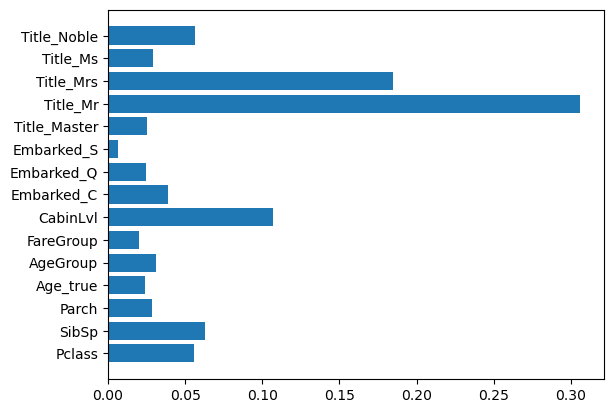

In [9]:
feature_importance = xgb_best.feature_importances_
feature_names = list(X_train.columns)
plt.barh(feature_names, feature_importance)

In [93]:
# n = 90
max_acc = 0
for m in [2,3,4]:
    for s in [0.7, 0.8, 0.9]:
        for g in [0,1]:
            for t in [0.5, 0.6, 0.9]:
                for l in [0.2, 0.3, 0.4]:
                    for r in [0.1, 0.15, 0.7]:
                        xgb = XGBClassifier(max_depth = m, subsample = s, colsample_bylevel = l, colsample_bytree = t, learning_rate = r, n_estimators = 30, gamma = g)
                        xgb.fit(X_train, y_train)
                        pred = xgb.predict(X_test)
                        acc = accuracy_score(y_test, pred)
                        if acc > max_acc:
                            max_acc = acc
                            print(acc, "with params max_depth =", m, "subsample =", s, "colsample_bylevel =", l, "colsample_bytree =", t, "learning_rate =", r, "n_estimators =", 30, "gamma =", g)

0.746268656716418 with params max_depth = 2 subsample = 0.7 colsample_bylevel = 0.2 colsample_bytree = 0.5 learning_rate = 0.1 n_estimators = 30 gamma = 0
0.7611940298507462 with params max_depth = 2 subsample = 0.7 colsample_bylevel = 0.2 colsample_bytree = 0.5 learning_rate = 0.15 n_estimators = 30 gamma = 0
0.8208955223880597 with params max_depth = 2 subsample = 0.7 colsample_bylevel = 0.2 colsample_bytree = 0.5 learning_rate = 0.7 n_estimators = 30 gamma = 0
0.832089552238806 with params max_depth = 2 subsample = 0.7 colsample_bylevel = 0.3 colsample_bytree = 0.6 learning_rate = 0.1 n_estimators = 30 gamma = 0
0.835820895522388 with params max_depth = 2 subsample = 0.7 colsample_bylevel = 0.4 colsample_bytree = 0.9 learning_rate = 0.15 n_estimators = 30 gamma = 0
0.8470149253731343 with params max_depth = 2 subsample = 0.7 colsample_bylevel = 0.4 colsample_bytree = 0.9 learning_rate = 0.7 n_estimators = 30 gamma = 1
